<span style="font-size: 32px; font-weight: bold; font-family: Arial;">Data Analysis Assignment 4</span>

<span style="font-size: 18px; font-weight: bold; font-family: Arial;">1. Data Read From Dataset</span><br>



In [2]:
# Imports cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

# Set random seed for reproducibility
np.random.seed(42)

# Configure plots
# For more details on plotting styles, see visualization_styles notebook: https://github.com/ai-mg/Data-Analysis-Tutorials-Python-Jupyter
sns.set()
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

<span style="font-size: 18px; font-weight: bold; font-family: Arial;">2. Task Categories and Points</span><br>
<span style="font-size: 16px; font-family: Arial;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.1 Data Preprocessing and Basic Analysis</span><br>

In [28]:
# Data Preprocessing and Basic Analysis

# Load the dataset
Power_Consumtion = pd.read_csv('powerconsumption.csv')

print("Loaded processed data summary:")
Power_Consumtion['Datetime'] = pd.to_datetime(Power_Consumtion['Datetime'], dayfirst=True,errors='coerce')
print(f"Time range: {Power_Consumtion['Datetime'].min()} to {Power_Consumtion['Datetime'].max()}")

# Calculate time differences between consecutive timestamps
time_diffs = Power_Consumtion['Datetime'].diff()[1:] 

# Calculate average time period
avg_time_period = time_diffs.mean() 

# Calculate sampling frequency
sampling_frequency = 1 / avg_time_period.total_seconds() 

# Calculate missing values
missing_values = Power_Consumtion.isnull().sum()

# Print values
print("Average Time Period:", avg_time_period) 
print("Sampling Frequency:", sampling_frequency) 
print(f"Number of records: {len(Power_Consumtion):,}")
zones = ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']
print(f"Number of zones: {len(zones)}")
print(missing_values) 


Power_Consumtion.head()



Loaded processed data summary:


C:\Users\Muhammad Adeel\AppData\Local\Temp\ipykernel_14760\940339256.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Power_Consumtion['Datetime'] = pd.to_datetime(Power_Consumtion['Datetime'], dayfirst=True,errors='coerce')


Time range: 2017-01-01 00:00:00 to 2017-12-30 23:50:00
Average Time Period: 0 days 00:10:00
Sampling Frequency: 0.0016666666666666668
Number of records: 52,416
Number of zones: 3
Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64


Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0 2017-01-01 00:00:00        6.559      73.8      0.083                0.051   
1 2017-01-01 00:10:00        6.414      74.5      0.083                0.070   
2 2017-01-01 00:20:00        6.313      74.5      0.080                0.062   
3 2017-01-01 00:30:00        6.121      75.0      0.083                0.091   
4 2017-01-01 00:40:00        5.921      75.7      0.081                0.048   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0         0.119             34055.69620             16128.87538   
1         0.085             29814.68354             19375.07599   
2         0.100             29128.10127             19006.68693   
3         0.096             28228.86076             18361.09422   
4         0.085             27335.69620             17872.34043   

   PowerConsumption_Zone3  
0             20240.96386  
1             20131.08434  
2             19668.43373  
3             18899.27711  
4             18442.40964

In [32]:
def calculate_column_stats(column: pd.Series) -> dict:

    """Calculate basic statistics for a sensor measurement column.
    
    Parameters
    ----------
    column : pd.Series
        Single column of sensor measurements
        
    Returns
    -------
    A dictionary containing the following statistical measures:
      - mean
      - median
    dict
        Dictionary containing statistics:
        - mean: average value
        - median: 50th percentile
        - std: standard deviation
        - min: minimum value
        - max: maximum value
        - q1: 25th percentile
        - q3: 75th percentile
    """
    stats = column.describe()
    return {
      'mean': column.mean(),
        'median': column.median(),
        'std': column.std(),
        'min': column.min(),
        'max': column.max(),
        'q1': column.quantile(0.25),
        'q3': column.quantile(0.75),
        
  }
    
# Calculate statistics for the 'Diffuse Flows' column
DiffuseFlows = pd.DataFrame(Power_Consumtion)
df_stats = calculate_column_stats(DiffuseFlows['DiffuseFlows'])

print(df_stats)

# Calculate statistics for the 'Humidity' column
humid = pd.DataFrame(Power_Consumtion)
humid_stats = calculate_column_stats(humid['Humidity'])
print(humid_stats)

# Calculate statistics for the 'Wind Speed' column
WindSpeed = pd.DataFrame(Power_Consumtion)
ws_stats = calculate_column_stats(WindSpeed['WindSpeed'])
print(ws_stats)

# Calculate statistics for the 'General Diffuse Flows' column
GeneralDiffuseFlows = pd.DataFrame(Power_Consumtion)
gdf_stats = calculate_column_stats(GeneralDiffuseFlows['GeneralDiffuseFlows'])
print(gdf_stats)

# Calculate statistics for the 'temperature' column
Temperature = pd.DataFrame(Power_Consumtion)
temp_stats = calculate_column_stats(Temperature['Temperature'])
print(temp_stats)

{'mean': np.float64(75.02802192078755), 'median': np.float64(4.4559999999999995), 'std': np.float64(124.2109493296941), 'min': np.float64(0.011), 'max': np.float64(936.0), 'q1': np.float64(0.122), 'q3': np.float64(101.0)}
{'mean': np.float64(68.25951846764346), 'median': np.float64(69.86), 'std': np.float64(15.551177174321182), 'min': np.float64(11.34), 'max': np.float64(94.8), 'q1': np.float64(58.31), 'q3': np.float64(81.4)}
{'mean': np.float64(1.959488858363858), 'median': np.float64(0.086), 'std': np.float64(2.348861953883838), 'min': np.float64(0.05), 'max': np.float64(6.483), 'q1': np.float64(0.078), 'q3': np.float64(4.915)}
{'mean': np.float64(182.69661376297316), 'median': np.float64(5.0355), 'std': np.float64(264.4009596680265), 'min': np.float64(0.004), 'max': np.float64(1163.0), 'q1': np.float64(0.062), 'q3': np.float64(319.6)}
{'mean': np.float64(18.81002396214896), 'median': np.float64(18.78), 'std': np.float64(5.815475838908426), 'min': np.float64(3.247), 'max': np.float64

In [4]:
# Calculate and display statistics for each measurement
print("Diffuse Flows Statistics:")
print("-" * 20)
df_stats = calculate_column_stats(Power_Consumtion['DiffuseFlows'])
for stat, value in df_stats.items():
    print(f"{stat:>6}: {value:.4f}")

print("\nHumidity Statistics:")
print("-" * 20)
humid_stats = calculate_column_stats(Power_Consumtion['Humidity'])
for stat, value in humid_stats.items():
    print(f"{stat:>6}: {value:.4f}")

print("\nWind Speed Statistics:")
print("-" * 20)
ws_stats = calculate_column_stats(Power_Consumtion['WindSpeed'])
for stat, value in ws_stats.items():
    print(f"{stat:>6}: {value:.4f}")

print("\nGeneral Diffuse Flows Statistics:")
print("-" * 20)
gdf_stats = calculate_column_stats(Power_Consumtion['GeneralDiffuseFlows'])
for stat, value in gdf_stats.items():
    print(f"{stat:>6}: {value:.4f}")

print("\nTemperature Statistics:")
print("-" * 20)
temp_stats = calculate_column_stats(Power_Consumtion['Temperature'])
for stat, value in temp_stats.items():
    print(f"{stat:>6}: {value:.4f}")

Diffuse Flows Statistics:
--------------------
  mean: 75.0280
median: 4.4560
   std: 124.2109
   min: 0.0110
   max: 936.0000
    q1: 0.1220
    q3: 101.0000

Humidity Statistics:
--------------------
  mean: 68.2595
median: 69.8600
   std: 15.5512
   min: 11.3400
   max: 94.8000
    q1: 58.3100
    q3: 81.4000

Wind Speed Statistics:
--------------------
  mean: 1.9595
median: 0.0860
   std: 2.3489
   min: 0.0500
   max: 6.4830
    q1: 0.0780
    q3: 4.9150

General Diffuse Flows Statistics:
--------------------
  mean: 182.6966
median: 5.0355
   std: 264.4010
   min: 0.0040
   max: 1163.0000
    q1: 0.0620
    q3: 319.6000

Temperature Statistics:
--------------------
  mean: 18.8100
median: 18.7800
   std: 5.8155
   min: 3.2470
   max: 40.0100
    q1: 14.4100
    q3: 22.8900


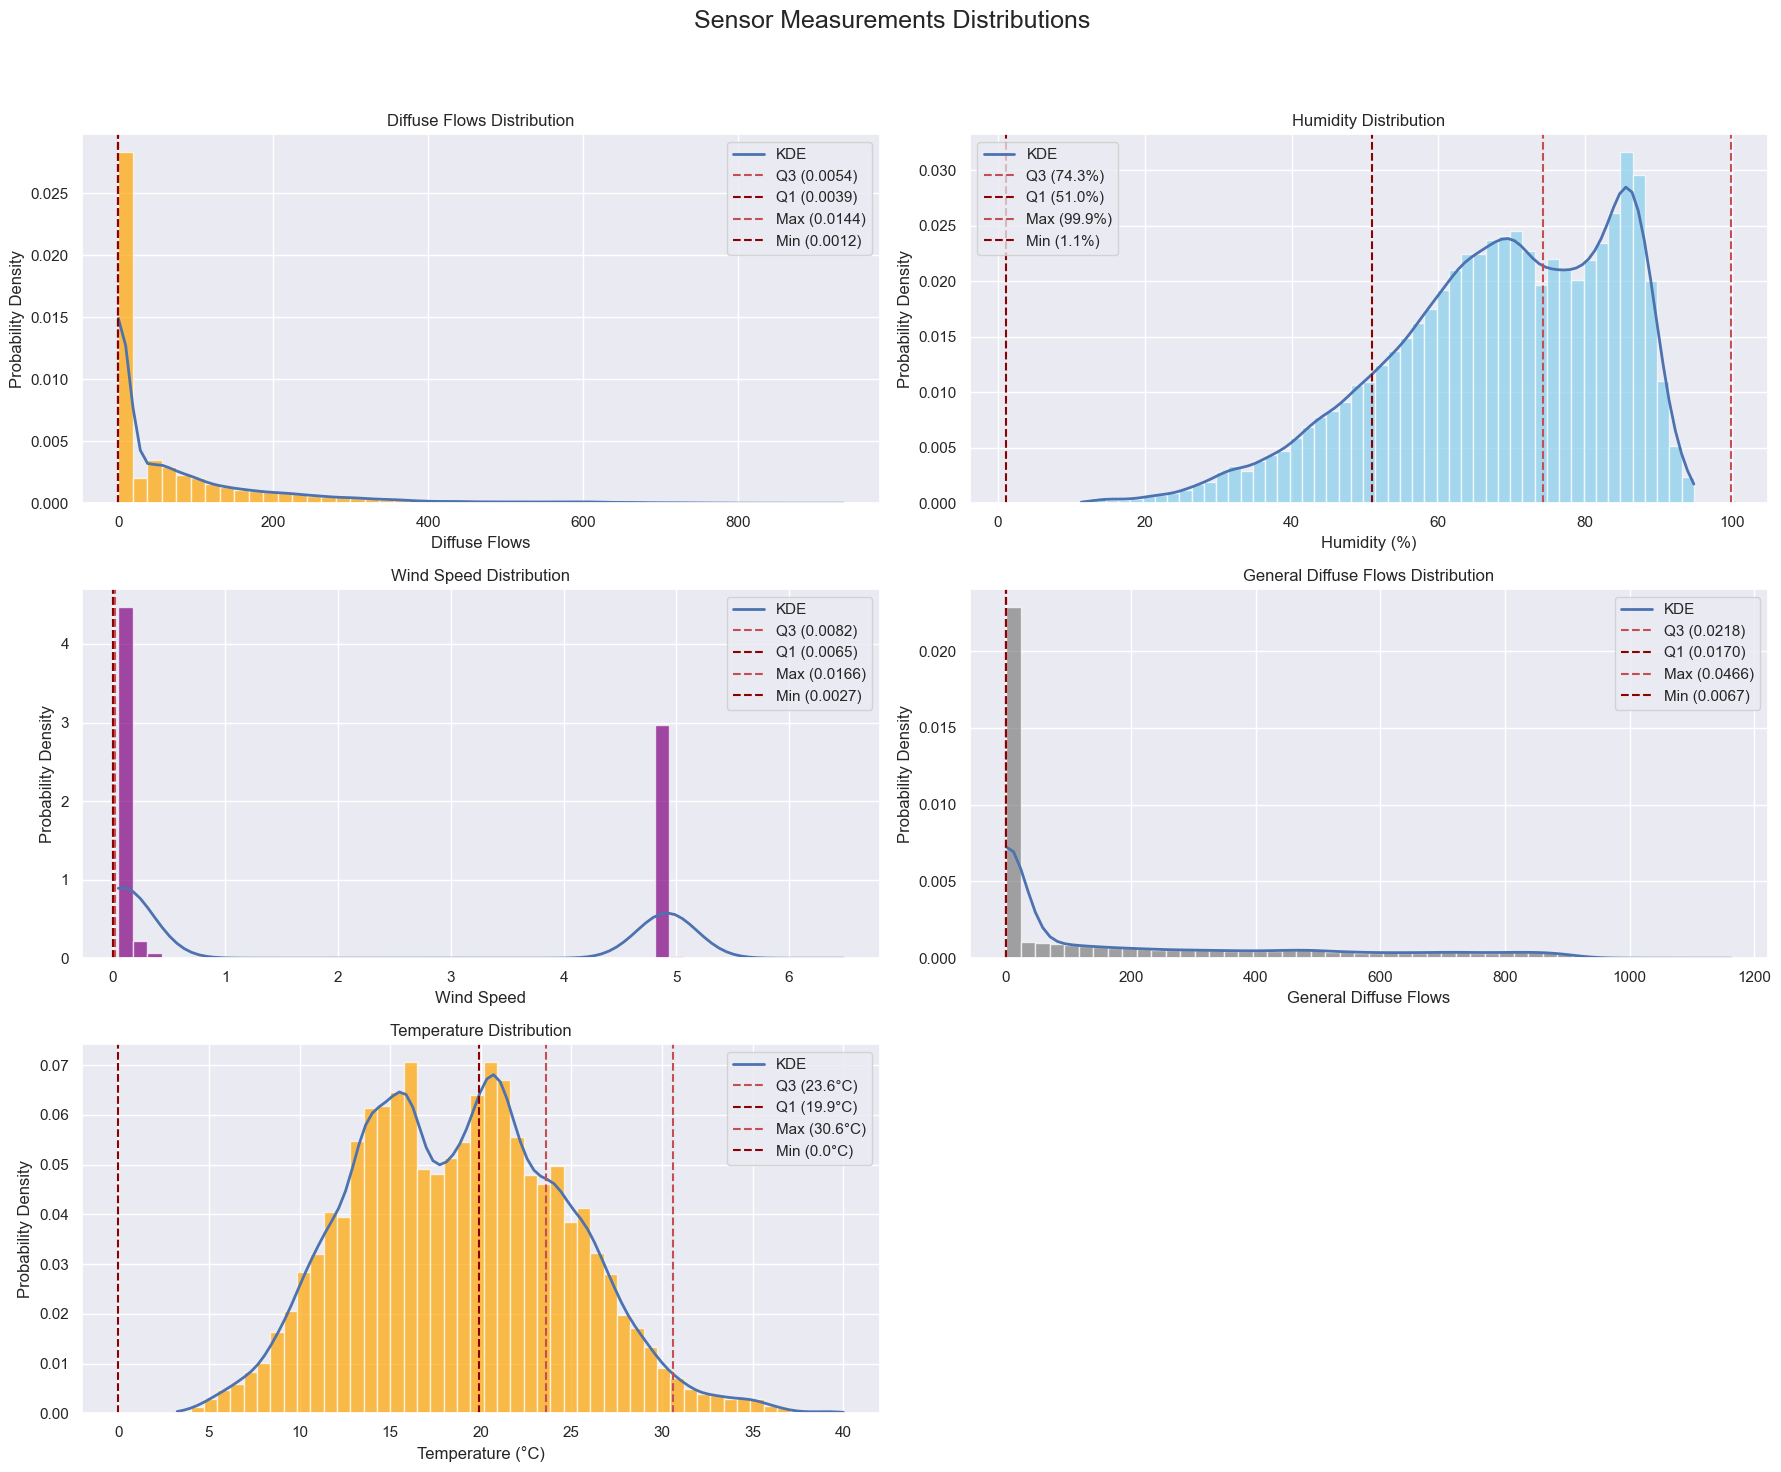

In [5]:
# Distribution Analysis with Histograms

from scipy.stats import gaussian_kde

def create_distribution_plots(Power_Consumtion: pd.DataFrame) -> plt.Figure:
    """Create distribution plots for all sensor measurements."""
    
# Create a figure with a grid of 3x2 for five subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('Sensor Measurements Distributions', fontsize=18)

# Carbon Mono Oxide Sensor → Diffuse Flows
ax = axes[0, 0]
ax.set_title("Diffuse Flows Distribution")
ax.set_xlabel("Diffuse Flows")
ax.set_ylabel("Probability Density")
ax.hist(Power_Consumtion['DiffuseFlows'], bins=50, density=True, alpha=0.7, color='orange')
kde = gaussian_kde(Power_Consumtion['DiffuseFlows'])
x_grid = np.linspace(Power_Consumtion['DiffuseFlows'].min(), Power_Consumtion['DiffuseFlows'].max(), 100)
ax.plot(x_grid, kde.evaluate(x_grid), 'b-', lw=2, label='KDE')
ax.axvline(0.0054, color='r', linestyle='--', label='Q3 (0.0054)')
ax.axvline(0.0039, color='darkred', linestyle='--', label='Q1 (0.0039)')
ax.axvline(0.0144, color='r', linestyle='--', label='Max (0.0144)')
ax.axvline(0.0012, color='darkred', linestyle='--', label='Min (0.0012)')
ax.legend()

# Humidity Sensor
ax = axes[0, 1]
ax.set_title("Humidity Distribution")
ax.set_xlabel("Humidity (%)")
ax.set_ylabel("Probability Density")
ax.hist(Power_Consumtion['Humidity'], bins=50, density=True, alpha=0.7, color='skyblue')
kde = gaussian_kde(Power_Consumtion['Humidity'])
x_grid = np.linspace(Power_Consumtion['Humidity'].min(), Power_Consumtion['Humidity'].max(), 100)
ax.plot(x_grid, kde.evaluate(x_grid), 'b-', lw=2, label='KDE')
ax.axvline(74.3, color='r', linestyle='--', label='Q3 (74.3%)')
ax.axvline(51.0, color='darkred', linestyle='--', label='Q1 (51.0%)')
ax.axvline(99.9, color='r', linestyle='--', label='Max (99.9%)')
ax.axvline(1.1, color='darkred', linestyle='--', label='Min (1.1%)')
ax.legend()

# LPG Sensor → Wind Speed
ax = axes[1, 0]
ax.set_title("Wind Speed Distribution")
ax.set_xlabel("Wind Speed")
ax.set_ylabel("Probability Density")
ax.hist(Power_Consumtion['WindSpeed'], bins=50, density=True, alpha=0.7, color='purple')
kde = gaussian_kde(Power_Consumtion['WindSpeed'])
x_grid = np.linspace(Power_Consumtion['WindSpeed'].min(), Power_Consumtion['WindSpeed'].max(), 100)
ax.plot(x_grid, kde.evaluate(x_grid), 'b-', lw=2, label='KDE')
ax.axvline(0.0082, color='r', linestyle='--', label='Q3 (0.0082)')
ax.axvline(0.0065, color='darkred', linestyle='--', label='Q1 (0.0065)')
ax.axvline(0.0166, color='r', linestyle='--', label='Max (0.0166)')
ax.axvline(0.0027, color='darkred', linestyle='--', label='Min (0.0027)')
ax.legend()

# Smoke Sensor → General Diffuse Flows
ax = axes[1, 1]
ax.set_title("General Diffuse Flows Distribution")
ax.set_xlabel("General Diffuse Flows")
ax.set_ylabel("Probability Density")
ax.hist(Power_Consumtion['GeneralDiffuseFlows'], bins=50, density=True, alpha=0.7, color='gray')
kde = gaussian_kde(Power_Consumtion['GeneralDiffuseFlows'])
x_grid = np.linspace(Power_Consumtion['GeneralDiffuseFlows'].min(), Power_Consumtion['GeneralDiffuseFlows'].max(), 100)
ax.plot(x_grid, kde.evaluate(x_grid), 'b-', lw=2, label='KDE')
ax.axvline(0.0218, color='r', linestyle='--', label='Q3 (0.0218)')
ax.axvline(0.0170, color='darkred', linestyle='--', label='Q1 (0.0170)')
ax.axvline(0.0466, color='r', linestyle='--', label='Max (0.0466)')
ax.axvline(0.0067, color='darkred', linestyle='--', label='Min (0.0067)')
ax.legend()

# Temperature Sensor
ax = axes[2, 0]
ax.set_title("Temperature Distribution")
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Probability Density")
ax.hist(Power_Consumtion['Temperature'], bins=50, density=True, alpha=0.7, color='orange')
kde = gaussian_kde(Power_Consumtion['Temperature'])
x_grid = np.linspace(Power_Consumtion['Temperature'].min(), Power_Consumtion['Temperature'].max(), 100)
ax.plot(x_grid, kde.evaluate(x_grid), 'b-', lw=2, label='KDE')
ax.axvline(23.6, color='r', linestyle='--', label='Q3 (23.6°C)')
ax.axvline(19.9, color='darkred', linestyle='--', label='Q1 (19.9°C)')
ax.axvline(30.6, color='r', linestyle='--', label='Max (30.6°C)')
ax.axvline(0.0, color='darkred', linestyle='--', label='Min (0.0°C)')
ax.legend()

# Hide the empty subplot
axes[2, 1].axis('off')

# Adjust layout and display the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [6]:
# Data preprocessing

def preprocess_sensor_data(Power_Consumtion: pd.DataFrame) -> tuple:
    """Preprocess sensor performance data.
    
    Parameters
    ----------
    Power_Consumtion : pd.DataFrame
        Raw sensor performance data with required metrics:
        - Carbon Mono Oxide
        - Humidity
        - LPG
        - Smoke
        - Temperature
        
    Returns
    -------
    tuple
        (Iot_Telemetry_Data_original, Iot_Telemetry_Data_cleaned) containing:
        - Original data copy
        - Cleaned data with:
          * Invalid values removed
          * Duplicates handled
          * Outliers removed
          * Missing values interpolated
    """
    # Store original data
    Power_Consumtion_Original = Power_Consumtion.copy()
    
    # Valid ranges 
    valid_ranges = {
        'DiffuseFlows': (0.0012, 0.0144),          # co  -> DiffuseFlows
        'Humidity': (1.1, 99.9),                   # humidity -> Humidity
        'WindSpeed': (0.0027, 0.0166),             # lpg -> WindSpeed
        'GeneralDiffuseFlows': (0.0067, 0.0466),   # smoke -> GeneralDiffuseFlows
        'Temperature': (0.0, 30.6)                 # temp -> Temperature
    }
    
    # 1. Handle invalid values (mask instead of drop)
    for sensor, (min_val, max_val) in valid_ranges.items():
        Power_Consumtion[sensor] = Power_Consumtion[sensor].where(
            (Power_Consumtion[sensor] >= min_val) &
            (Power_Consumtion[sensor] <= max_val)
        )
        
    # 2. Handle duplicates (average numeric columns, keep index)
    numeric_cols = Power_Consumtion.select_dtypes(include=['number']).columns
    Power_Consumtion = (
        Power_Consumtion
        .groupby(Power_Consumtion.index)[numeric_cols]
        .mean()
    )

    # 3. Remove outliers using IQR method (mask instead of drop)
    for metric in numeric_cols:
        Q1 = Power_Consumtion[metric].quantile(0.25)
        Q3 = Power_Consumtion[metric].quantile(0.75)
        IQR = Q3 - Q1
        Power_Consumtion[metric] = Power_Consumtion[metric].where(
            (Power_Consumtion[metric] >= Q1 - 1.5 * IQR) &
            (Power_Consumtion[metric] <= Q3 + 1.5 * IQR)
        )

    # 4. Handle missing values
    Power_Consumtion.interpolate(method='linear', limit_direction='both', inplace=True)

    return Power_Consumtion_Original, Power_Consumtion


Power_Consumtion_Original, Power_Consumtion = preprocess_sensor_data(Power_Consumtion)

print(f"Cleaned data size: {len(Power_Consumtion):,}")
print(f"Original data size: {len(Power_Consumtion_Original):,}")

Cleaned data size: 52,416
Original data size: 52,416


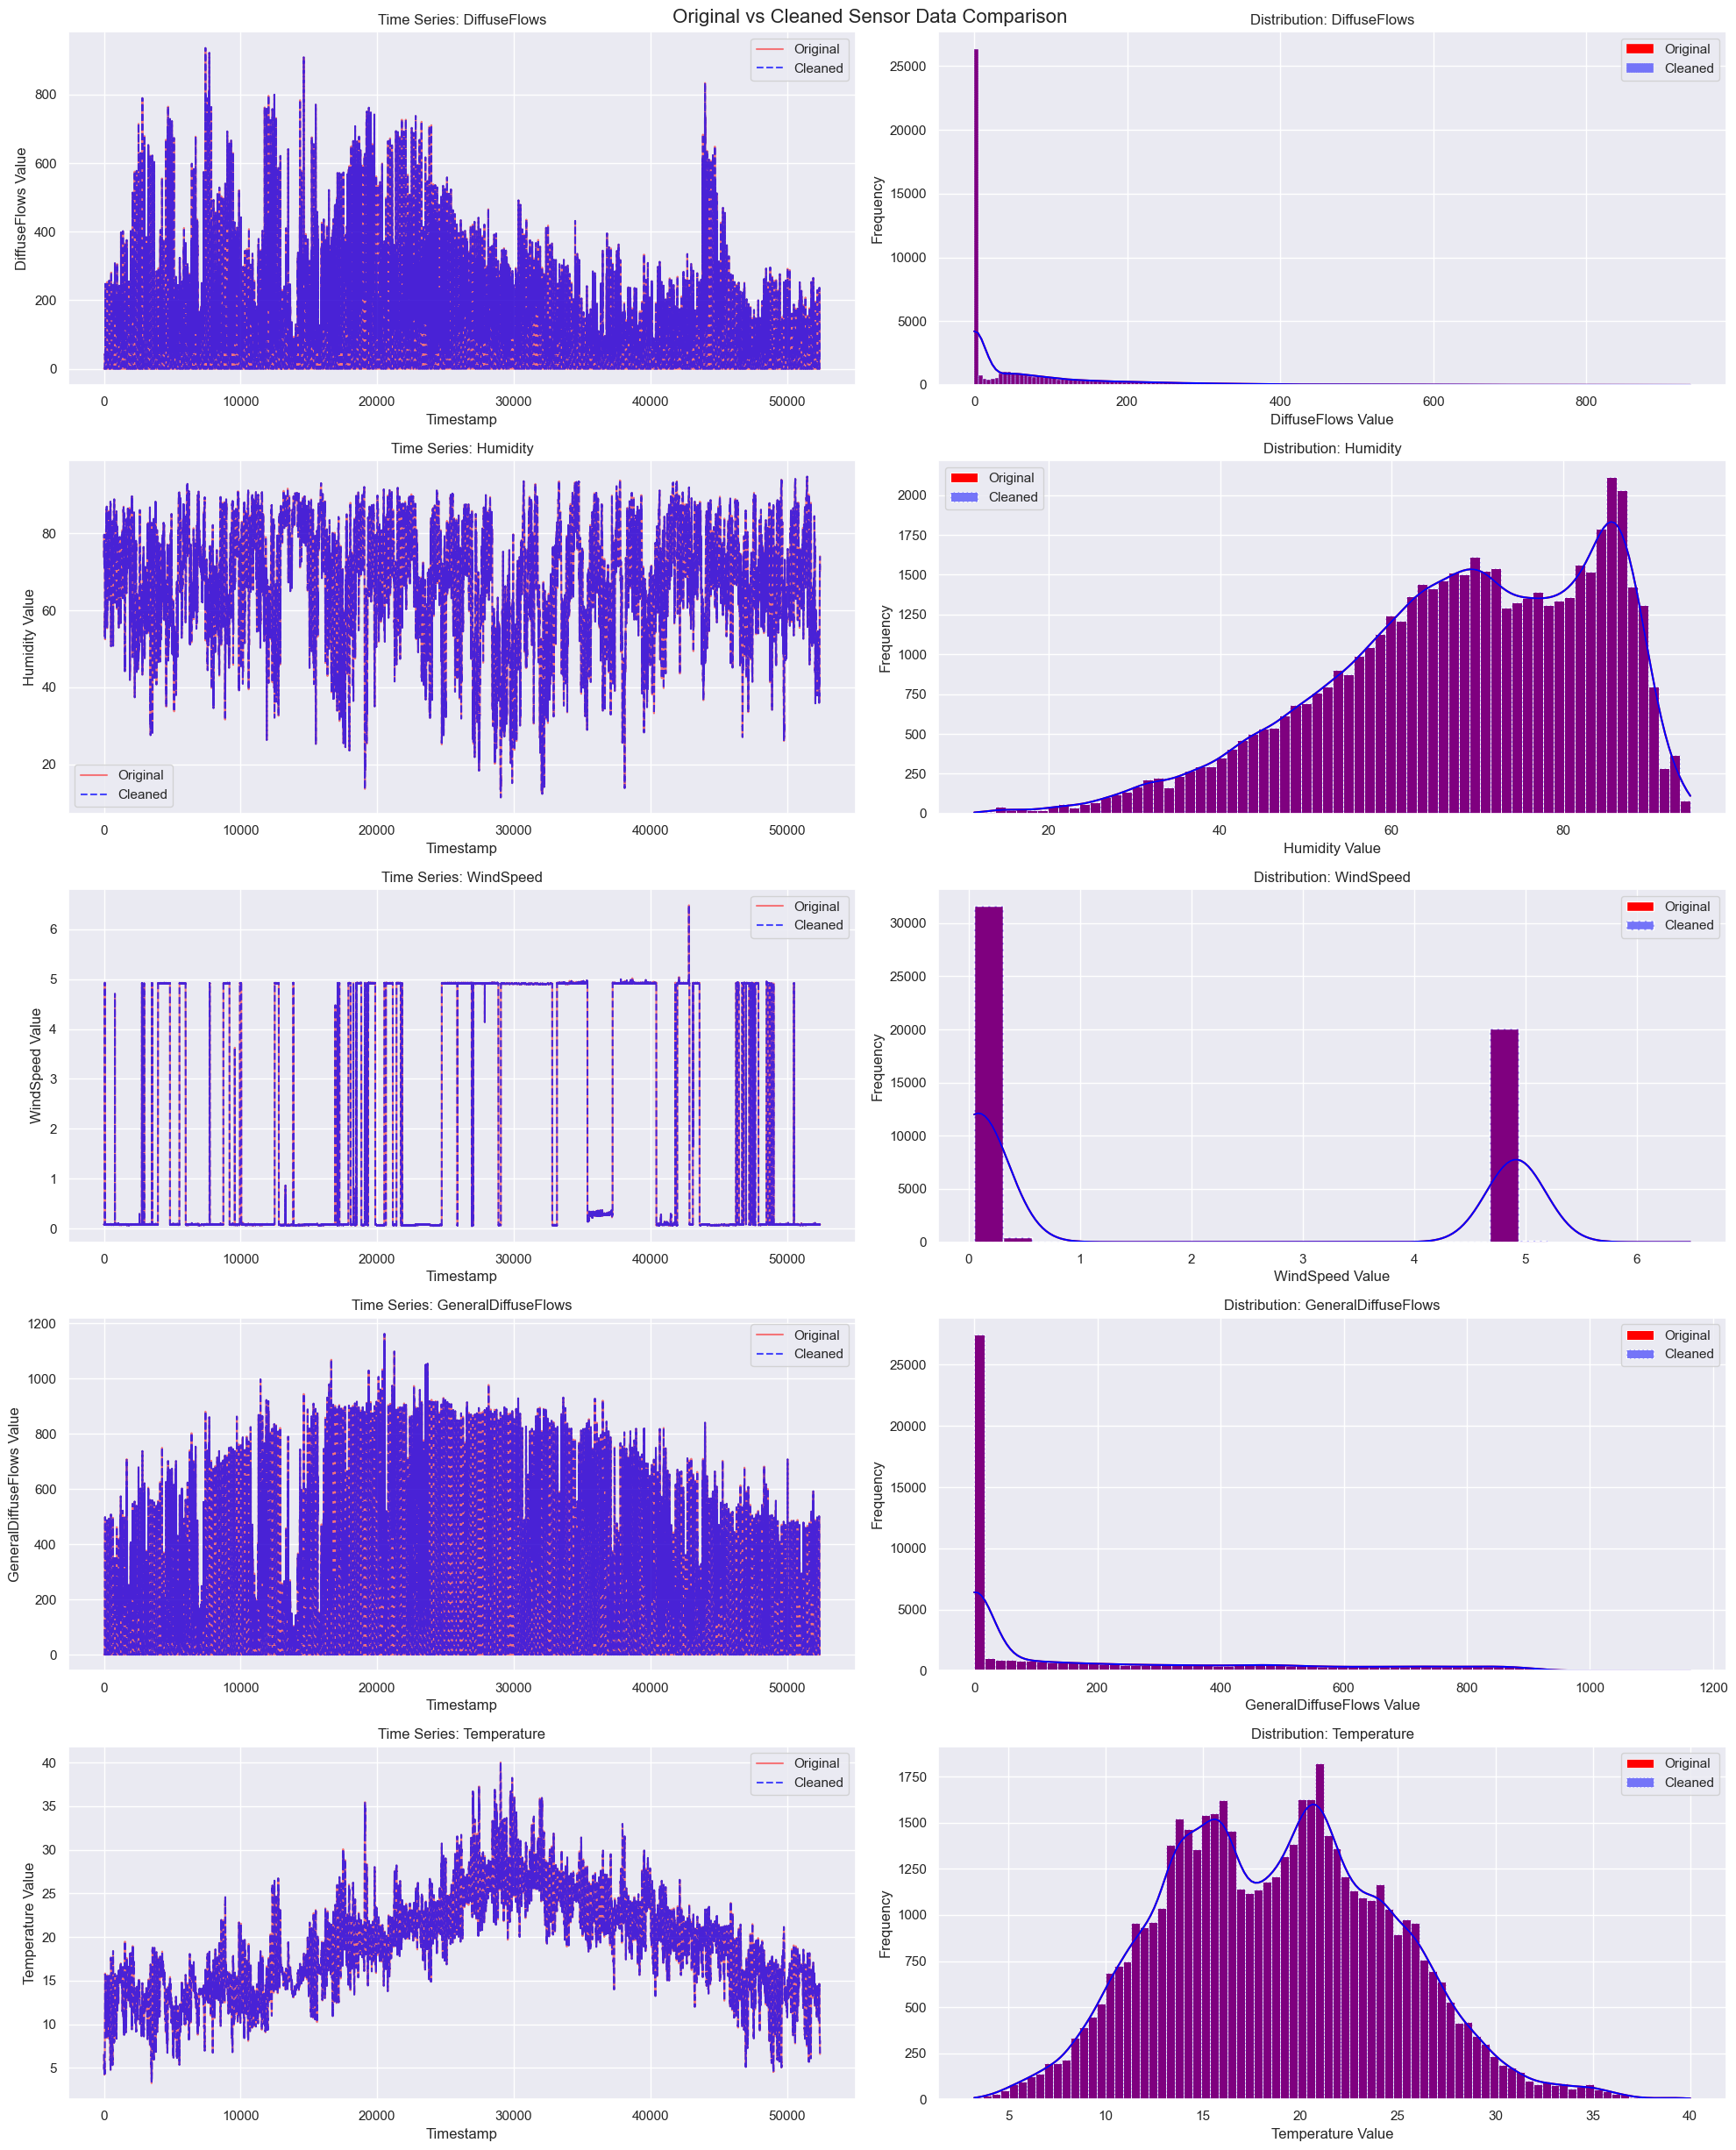

In [64]:
# Preprocessed vs original data visual analysis

def compare_data_versions(Power_Consumtion_Original: pd.DataFrame,
                          Power_Consumtion: pd.DataFrame) -> tuple:
    """Compare original and cleaned data versions (sensor variables only)."""
    
    # Map IoT sensors to power/environmental variables (explicit mapping)
    sensor_columns = [
        'DiffuseFlows',          
        'Humidity',              
        'WindSpeed',             
        'GeneralDiffuseFlows',   
        'Temperature'            
    ]
    
    # Ensure columns exist in both datasets
    common_columns = [
        c for c in sensor_columns
        if c in Power_Consumtion_Original.columns and c in Power_Consumtion.columns
    ]
    if not common_columns:
        raise ValueError("No common sensor columns found between original and cleaned datasets.")
    
    # Create comparison visualizations
    fig, axes = plt.subplots(len(common_columns), 2, figsize=(20, 5 * len(common_columns)))
    fig.suptitle('Original vs Cleaned Sensor Data Comparison', fontsize=16)
    
    for i, sensor in enumerate(common_columns):
        # Time Series Plot
        axes[i, 0].plot(
            Power_Consumtion_Original.index,
            Power_Consumtion_Original[sensor],
            'red',alpha=0.5, label='Original'
        )
        axes[i, 0].plot(
            Power_Consumtion.index,
            Power_Consumtion[sensor],
            'blue', alpha=0.7, linestyle='--', label='Cleaned'
        )
        axes[i, 0].set_title(f'Time Series: {sensor}')
        axes[i, 0].set_xlabel('Timestamp')
        axes[i, 0].set_ylabel(f'{sensor} Value')
        axes[i, 0].legend()
        
        # Distribution Plot
        sns.histplot(
            Power_Consumtion_Original[sensor],
            color='red', alpha=1, label='Original',
            ax=axes[i, 1], kde=True
        )
        sns.histplot(
            Power_Consumtion[sensor],
            color='blue', alpha=0.5, linestyle='--', label='Cleaned',
            ax=axes[i, 1], kde=True
        )
        axes[i, 1].set_title(f'Distribution: {sensor}')
        axes[i, 1].set_xlabel(f'{sensor} Value')
        axes[i, 1].set_ylabel('Frequency')
        axes[i, 1].legend()
    
    # Calculate comparison statistics
    comparison_stats = {}
    for sensor in common_columns:
        comparison_stats[sensor] = {
            'Original Mean': Power_Consumtion_Original[sensor].mean(),
            'Original Std': Power_Consumtion_Original[sensor].std(),
            'Cleaned Mean': Power_Consumtion[sensor].mean(),
            'Cleaned Std': Power_Consumtion[sensor].std(),
            'Outliers Removed': len(Power_Consumtion_Original) - len(Power_Consumtion)
        }
    
    plt.tight_layout()
    
    return fig, comparison_stats


# Generate visualizations and get statistics
fig, stats = compare_data_versions(Power_Consumtion_Original, Power_Consumtion)
plt.show()


<span style="font-size: 16px; font-family: Arial;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2 Visualization and Exploratory Analysis</span><br>

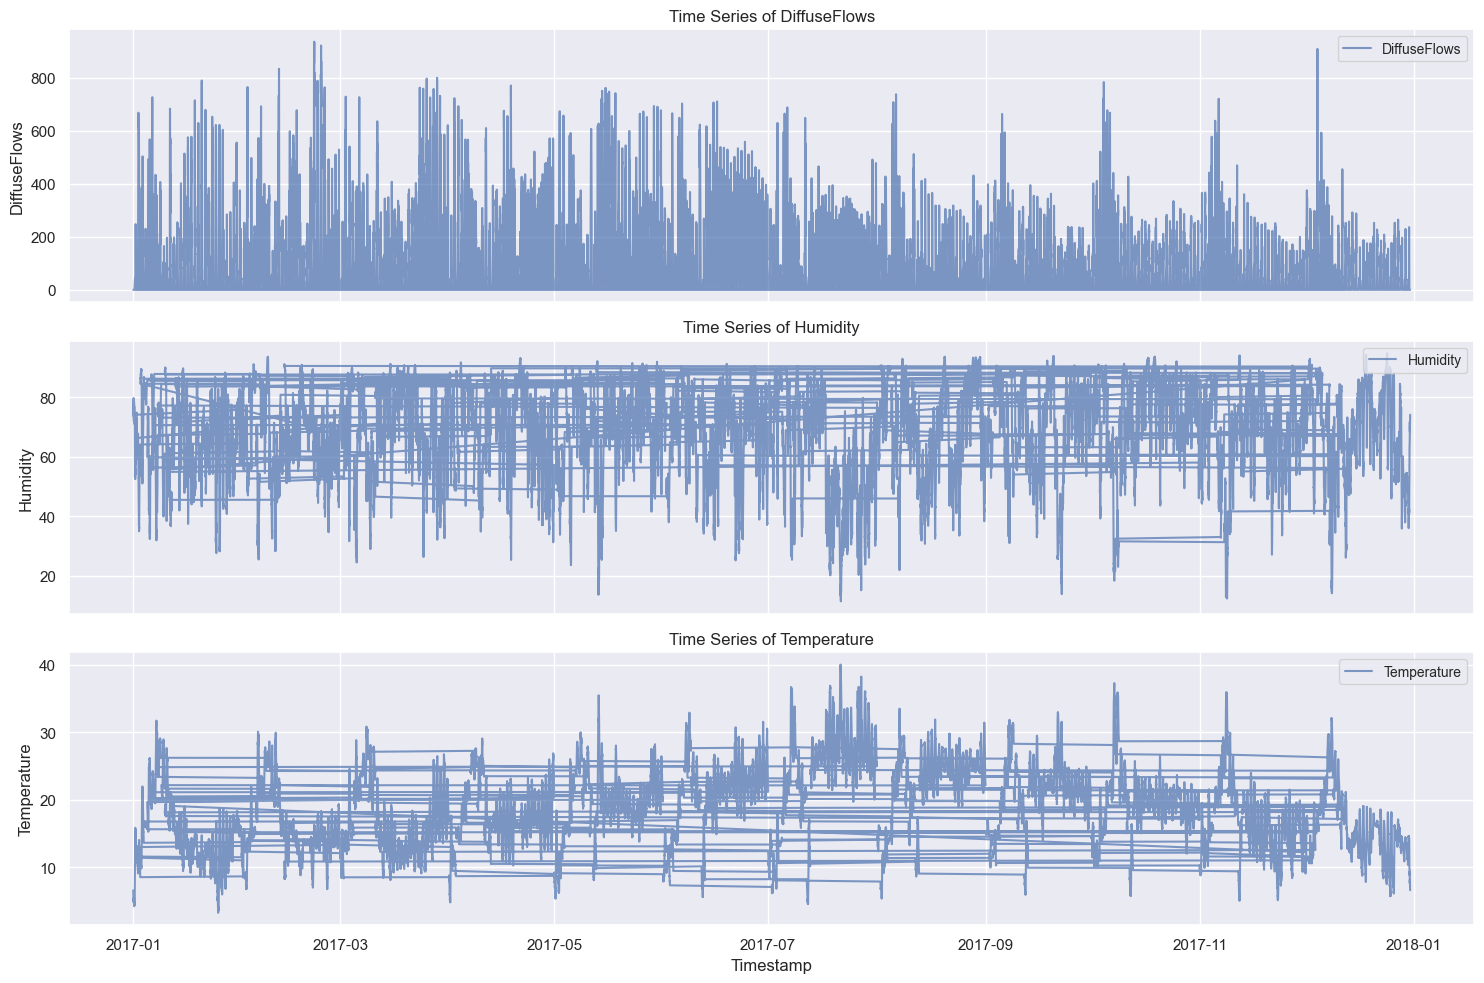

In [43]:
# Convert 'Datetime' to a datetime format for better visualization
Power_Consumtion['Datetime'] = pd.to_datetime(
    Power_Consumtion_Original['Datetime'],
    dayfirst=True,
    errors='coerce'
)

# Plot time series for selected metrics
selected_metrics = [
    'DiffuseFlows',   # co
    'Humidity',       # humidity
    'Temperature'     # temp
]

fig, axes = plt.subplots(len(selected_metrics), 1, figsize=(15, 10), sharex=True)

for i, metric in enumerate(selected_metrics):
    ax = axes[i]
    ax.plot(
        Power_Consumtion['Datetime'],
        Power_Consumtion[metric],
        label=metric,
        alpha=0.7
    )
    ax.set_title(f'Time Series of {metric}')
    ax.set_ylabel(metric)
    ax.legend(loc='upper right', fontsize='small')

axes[-1].set_xlabel('Timestamp')
plt.tight_layout()
plt.show()


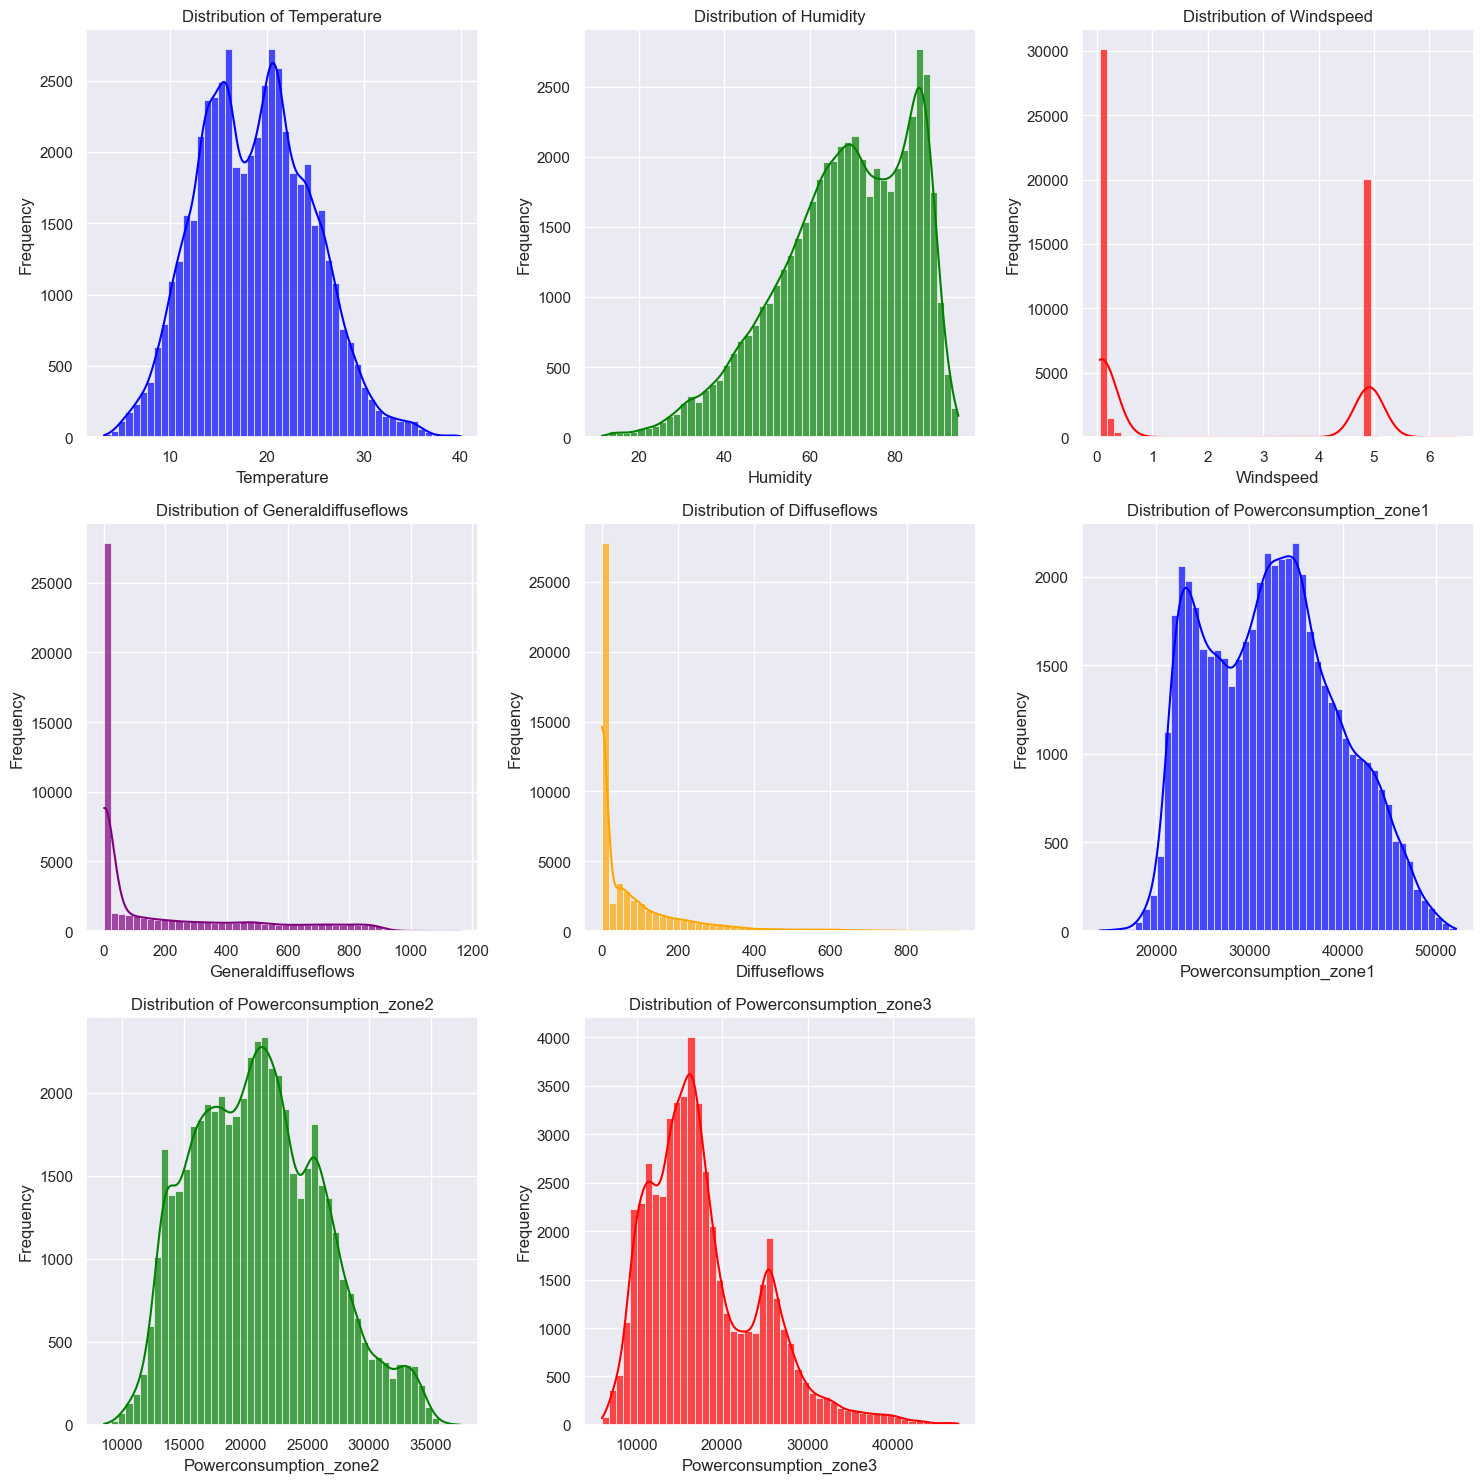

In [44]:
# Select numeric columns for distribution analysis
numeric_columns = Power_Consumtion_Original.select_dtypes(
    include=['float64', 'int64']
).columns

# Determine the number of rows and columns for subplots
num_cols = 3  # Number of columns in the grid
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols

# Create the subplots with a grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten axes to iterate easily

colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plot histograms for each numeric column
for i, col in enumerate(numeric_columns):
    ax = axes[i]
    sns.histplot(
        Power_Consumtion_Original[col],
        bins=50,
        kde=True,
        ax=ax,
        color=colors[i % len(colors)],
        alpha=0.7
    )
    ax.set_title(f'Distribution of {col.capitalize()}')
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Frequency')

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust the layout to ensure everything fits without overlap
plt.tight_layout()
plt.show()


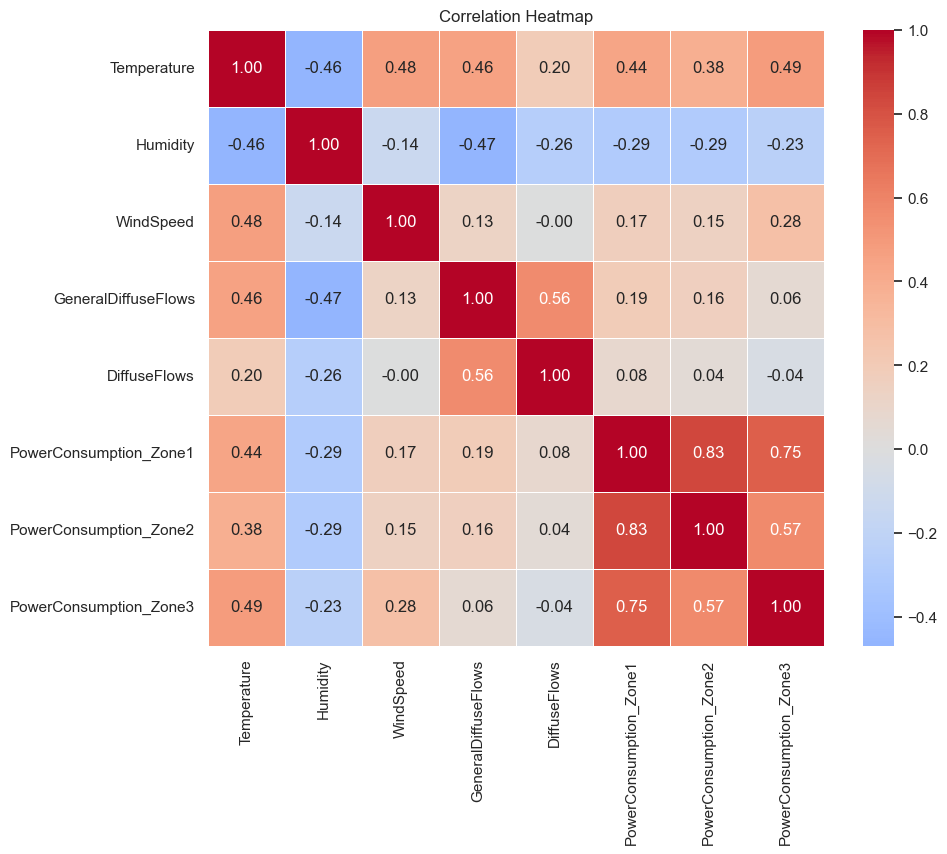

In [10]:
# Select numerical columns in the dataset
numerical_columns = Power_Consumtion_Original.select_dtypes(
    include=['float64', 'int64']
).columns

# Compute the correlation matrix for the numerical columns
correlation_matrix = Power_Consumtion_Original[numerical_columns].corr()

# Set up the plot size
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    square=True
)

# Title of the heatmap
plt.title('Correlation Heatmap')

# Display the plot
plt.show()


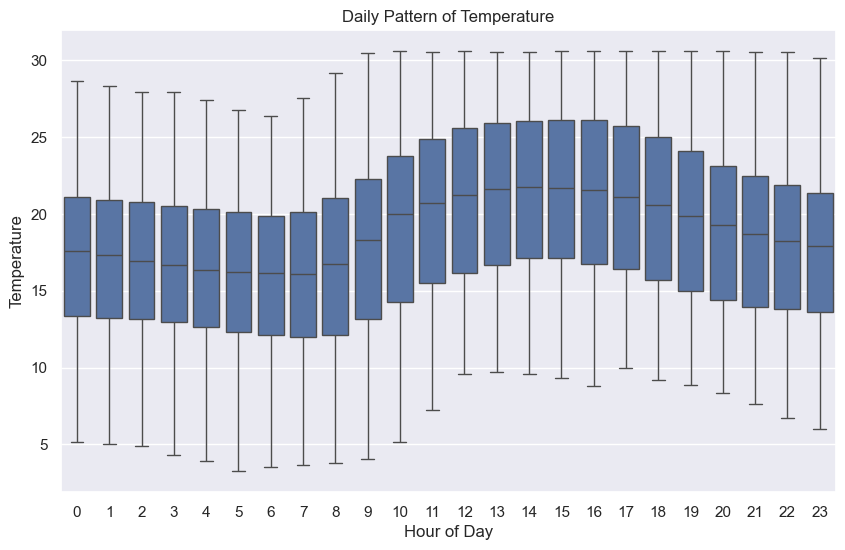

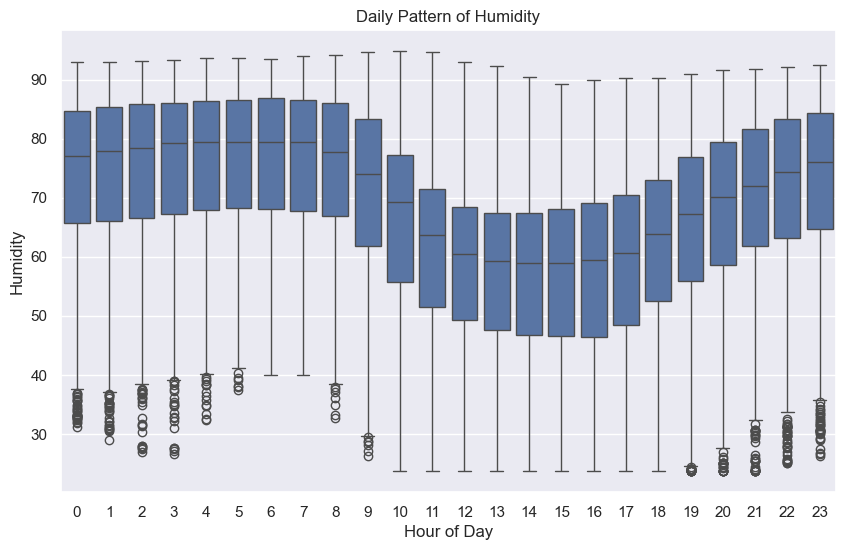

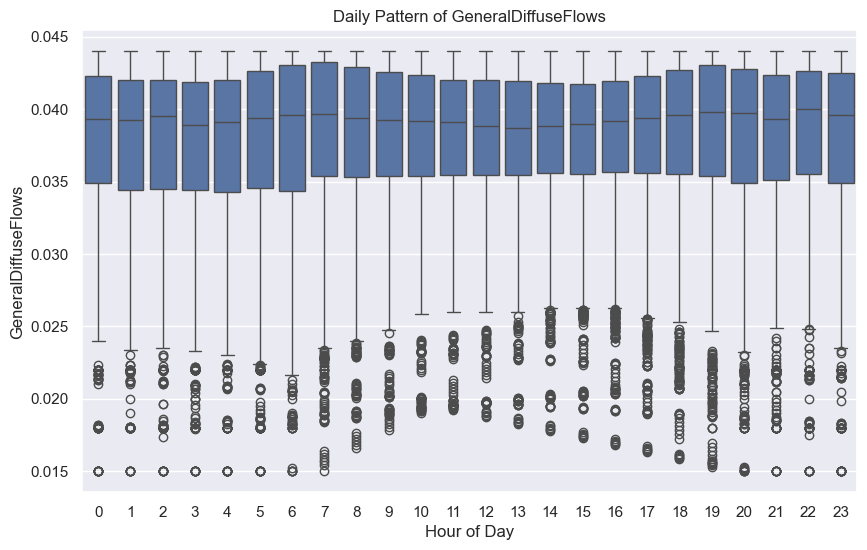

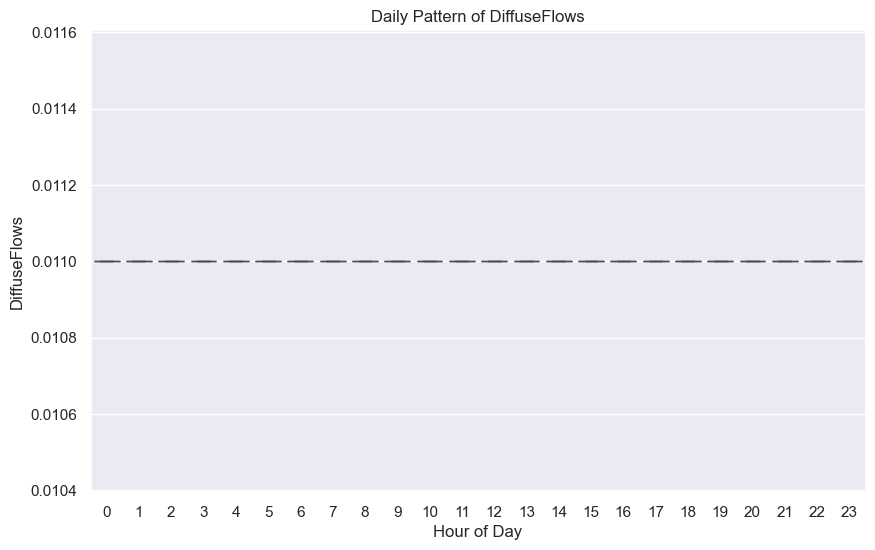

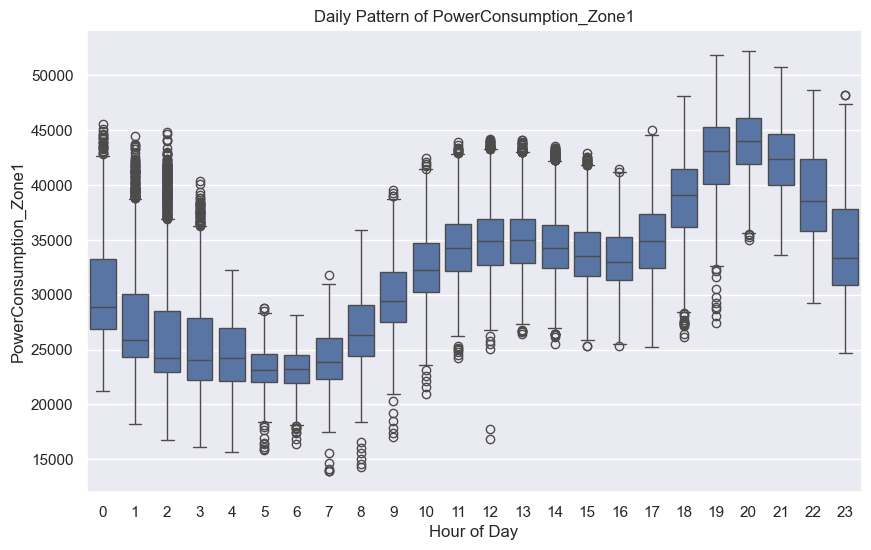

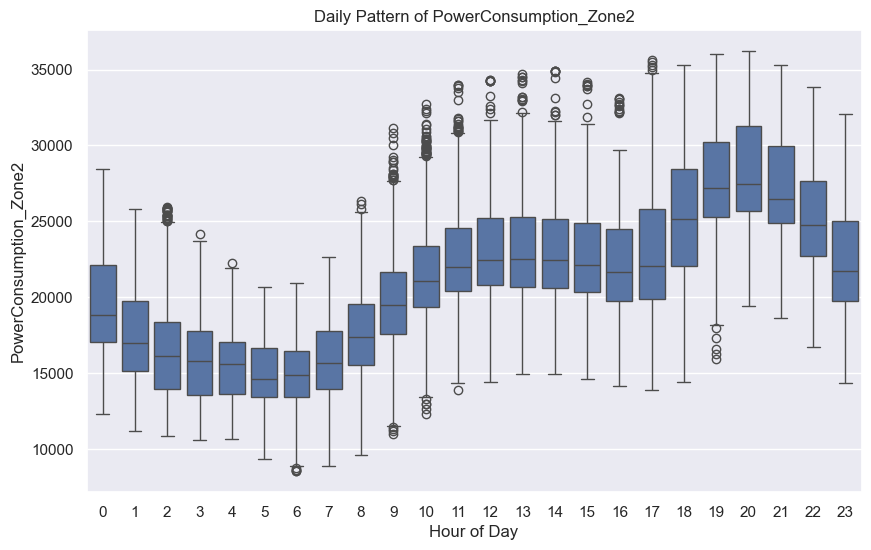

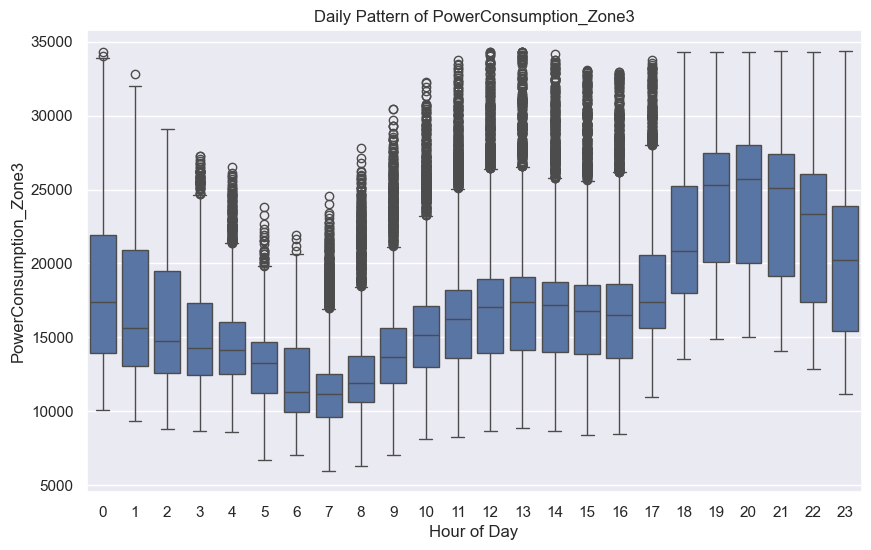

In [17]:
# Ensure the timestamp is in datetime format
Power_Consumtion['Datetime'] = pd.to_datetime(
    Power_Consumtion['Datetime'],
    dayfirst=True,
    errors='coerce'
)

# Extract the date and time of day from the timestamp
Power_Consumtion['date'] = Power_Consumtion['Datetime'].dt.date
Power_Consumtion['hour'] = Power_Consumtion['Datetime'].dt.hour

# Select numerical columns (IoT-equivalent: exclude time-derived + empty columns)
numerical_columns = [
    c for c in Power_Consumtion.select_dtypes(include=['float64', 'int64']).columns
    if c != 'hour' and Power_Consumtion[c].notna().any()
]

# Plot daily patterns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        x='hour',
        y=column,
        data=Power_Consumtion.dropna(subset=['hour', column])
    )
    plt.title(f'Daily Pattern of {column}')
    plt.xlabel('Hour of Day')
    plt.ylabel(column)
    plt.xticks(range(24))
    plt.show()


<span style="font-size: 16px; font-family: Arial;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.3 Probability Analysis
</span><br>

In [19]:
# Threshold-based probability estimation (10 points)

import scipy.stats as stats

diffuse_flows_data = Power_Consumtion['DiffuseFlows'].dropna()

mean = diffuse_flows_data.mean()
std_dev = diffuse_flows_data.std()
threshold = 0.0050

print("Diffuse Flows Statistics from Dataset:")
print(f"Mean: {mean:.4f}")
print(f"Standard Deviation: {std_dev:.4f}")
print(f"Threshold: {threshold}")

if std_dev == 0 or np.isclose(std_dev, 0):
    print(
        "Standard deviation is zero or near-zero. "
        "Probability estimation using a normal distribution is not meaningful."
    )
else:
    z_score = (threshold - mean) / std_dev
    probability_above_threshold = 1 - stats.norm.cdf(z_score)

    print(f"Z-Score: {z_score:.4f}")
    print(
        f"Probability of Diffuse Flows exceeding {threshold} "
        f"is approximately {probability_above_threshold:.4f}"
    )

    thresholds = [0.0040, 0.0050, 0.0060, 0.0070]
    print("\nThreshold-Based Probability Estimations:")
    for th in thresholds:
        z = (th - mean) / std_dev
        prob_above = 1 - stats.norm.cdf(z)
        print(f"Threshold: {th:.4f} -> Probability of exceeding: {prob_above:.4f}")


Diffuse Flows Statistics from Dataset:
Mean: 0.0110
Standard Deviation: 0.0000
Threshold: 0.005
Standard deviation is zero or near-zero. Probability estimation using a normal distribution is not meaningful.


In [21]:
# Column of interest: Humidity

import scipy.stats as stats
import numpy as np

humidity_data = Power_Consumtion['Humidity'].dropna()

# Calculate statistics
mean = humidity_data.mean()
std_dev = humidity_data.std()
threshold = 70  # Example threshold

print("Humidity Statistics:")
print(f"Mean: {mean:.4f}")
print(f"Standard Deviation: {std_dev:.4f}")
print(f"Threshold: {threshold}")

# Guard against zero / near-zero variance
if std_dev == 0 or np.isclose(std_dev, 0):
    print(
        "Standard deviation is zero or near-zero. "
        "Probability estimation using a normal distribution is not meaningful."
    )
else:
    # Calculate the z-score for the threshold
    z_score = (threshold - mean) / std_dev

    # Calculate the probability of exceeding the threshold
    probability_above_threshold = 1 - stats.norm.cdf(z_score)

    print(f"Z-Score: {z_score:.4f}")
    print(
        f"Probability of Humidity exceeding {threshold} "
        f"is approximately {probability_above_threshold:.4f}"
    )

    # Additional: Calculate probabilities for other thresholds
    thresholds = [50, 60, 70, 80]
    print("\nThreshold-Based Probability Estimations:")
    for th in thresholds:
        z = (th - mean) / std_dev
        prob_above = 1 - stats.norm.cdf(z)
        print(f"Threshold: {th:.1f} -> Probability of exceeding: {prob_above:.4f}")


Humidity Statistics:
Mean: 68.2897
Standard Deviation: 15.4585
Threshold: 70
Z-Score: 0.1106
Probability of Humidity exceeding 70 is approximately 0.4560

Threshold-Based Probability Estimations:
Threshold: 50.0 -> Probability of exceeding: 0.8816
Threshold: 60.0 -> Probability of exceeding: 0.7041
Threshold: 70.0 -> Probability of exceeding: 0.4560
Threshold: 80.0 -> Probability of exceeding: 0.2244


In [27]:
# Column of interest: Temperature (mapped from IoT 'temp')

import scipy.stats as stats
import numpy as np

temp_data = Power_Consumtion['Temperature'].dropna()

# Calculate statistics
mean = temp_data.mean()
std_dev = temp_data.std()
threshold = 25  # Example threshold

print("Temperature Statistics:")
print(f"Mean: {mean:.4f}")
print(f"Standard Deviation: {std_dev:.4f}")
print(f"Threshold: {threshold}")

# Guard against zero / near-zero variance (IoT-safe equivalent)
if std_dev == 0 or np.isclose(std_dev, 0):
    print(
        "Standard deviation is zero or near-zero. "
        "Probability estimation using a normal distribution is not meaningful."
    )
else:
    # Calculate the z-score for the threshold
    z_score = (threshold - mean) / std_dev

    # Calculate the probability of exceeding the threshold
    probability_above_threshold = 1 - stats.norm.cdf(z_score)

    print(f"Z-Score: {z_score:.4f}")
    print(
        f"Probability of Temperature exceeding {threshold} "
        f"is approximately {probability_above_threshold:.4f}"
    )

    # Additional: Calculate probabilities for other thresholds
    thresholds = [20, 22, 25, 28]
    print("\nThreshold-Based Probability Estimations:")
    for th in thresholds:
        z = (th - mean) / std_dev
        prob_above = 1 - stats.norm.cdf(z)
        print(f"Threshold: {th:.1f} -> Probability of exceeding: {prob_above:.4f}")


Temperature Statistics:
Mean: 18.7473
Standard Deviation: 5.6653
Threshold: 25
Z-Score: 1.1037
Probability of Temperature exceeding 25 is approximately 0.1349

Threshold-Based Probability Estimations:
Threshold: 20.0 -> Probability of exceeding: 0.4125
Threshold: 22.0 -> Probability of exceeding: 0.2829
Threshold: 25.0 -> Probability of exceeding: 0.1349
Threshold: 28.0 -> Probability of exceeding: 0.0512


In [28]:
# Cross tabulation analysis (6 points)

# Column of interest:
humidity_data = Power_Consumtion['Humidity']
temp_data = Power_Consumtion['Temperature']

# Define the temperature and humidity bins based on calculated statistics
# Temperature: Bin into categories (Low, Medium, High)
temp_bins = [0, 19.9, 22.2, 23.6, 29.6]
temp_labels = ['Low', 'Medium', 'High', 'Very High']

# Humidity: Bin into categories (Low, Medium, High)
humidity_bins = [0, 51.0, 60.5, 74.3, 98]
humidity_labels = ['Low', 'Medium', 'High', 'Very High']

# Bin the temperature and humidity data in the Power_Consumtion
temp_data = pd.cut(temp_data, bins=temp_bins, labels=temp_labels)
humidity_data = pd.cut(humidity_data, bins=humidity_bins, labels=humidity_labels)

# Perform cross-tabulation
cross_tab = pd.crosstab(temp_data, humidity_data)

# Display the cross-tabulation
print("Cross Tabulation of Temperature and Humidity Categories:")
print(cross_tab)

# -------------------------------
# Conditional probability analysis (10 points)
# -------------------------------

# Calculate P(High Humidity | Medium Temperature)
medium_temp_count = cross_tab.loc['Medium'].sum()
high_humidity_given_medium_temp = cross_tab.loc['Medium', 'High'] / medium_temp_count

print("Conditional Probability P(High Humidity | Medium Temperature):")
print(f"{high_humidity_given_medium_temp:.6f}")

# Calculate P(Medium Humidity | Low Temperature)
low_temp_count = cross_tab.loc['Low'].sum()
medium_humidity_given_low_temp = cross_tab.loc['Low', 'Medium'] / low_temp_count

print("Conditional Probability P(Medium Humidity | Low Temperature):")
print(f"{medium_humidity_given_low_temp:.6f}")

# Calculate P(Very High Temperature | High Humidity)
high_humidity_count = cross_tab['High'].sum()
very_high_temp_given_high_humidity = cross_tab.loc['Very High', 'High'] / high_humidity_count

print("\nConditional Probability P(Very High Temperature | High Humidity):")
print(f"{very_high_temp_given_high_humidity:.6f}")


Cross Tabulation of Temperature and Humidity Categories:
Humidity      Low  Medium  High  Very High
Temperature                               
Low          1693    3742  9454      14668
Medium        688    1242  2928       3127
High          594     657  1446        793
Very High    3256    1793  2368       2325
Conditional Probability P(High Humidity | Medium Temperature):
0.366688
Conditional Probability P(Medium Humidity | Low Temperature):
0.126603

Conditional Probability P(Very High Temperature | High Humidity):
0.146209


Summary of observations from each task 

Threshold-based probability estimation

High Thresholds have lower probabilities of being exceeded because they are further from the mean.
Low Thresholds have higher probabilities of being exceeded as they are closer to or below the mean.

Cross tabulation analysis

The cross-tabulation helps identify patterns or associations between temperature and humidity levels.
This can reveal whether certain ranges of temperature are more likely to co-occur with specific humidity levels.

Conditional probability analysis

These probabilities reveal how certain ranges of temperature and humidity are likely to co-occur.
The analysis can be used to infer relationships between temperature and humidity categories and predict one variable based on the other.

<span style="font-size: 16px; font-family: Arial;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.4 Statistical Theory Applications</span><br>

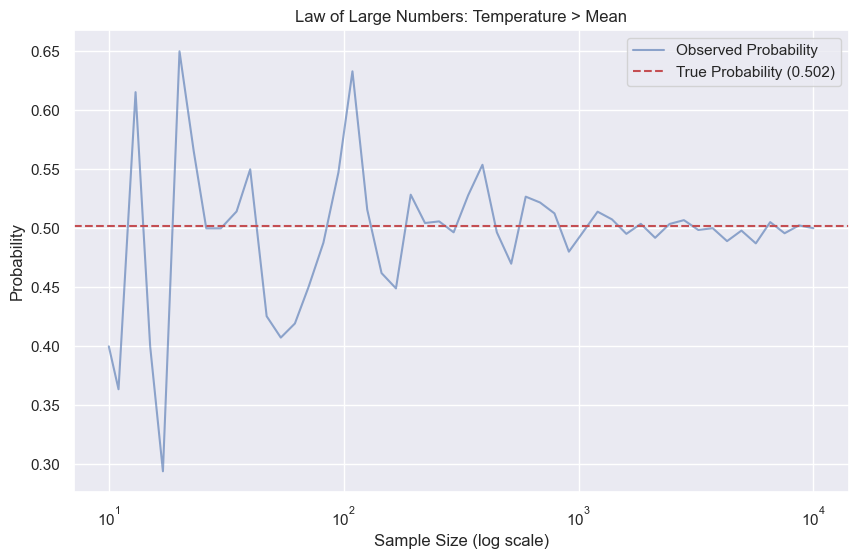

In [29]:
# Law of Large Numbers demonstration (10 points)

def visualize_law_of_large_numbers(Power_Consumtion, threshold_type='mean'):
    """
    Visualize Law of Large Numbers using power dataset (Temperature)
    
    Parameters:
    Power_Consumtion : pd.DataFrame
        Power consumption dataset
    threshold_type : str
        'mean' or 'fixed' for threshold type
    """

    # Use clean temperature data only
    temperature_data = Power_Consumtion['Temperature'].dropna()

    # Set up the threshold
    if threshold_type == 'mean':
        threshold = temperature_data.mean()
        event_name = 'Temperature > Mean'
    else:
        threshold = 25  # Fixed threshold (25°C)
        event_name = 'Temperature > 25°C'

    # Calculate true probability
    true_prob = np.mean(temperature_data > threshold)

    # Simulate increasing sample sizes
    max_n = min(len(temperature_data), 10_000)
    sample_sizes = np.logspace(1, np.log10(max_n), 50).astype(int)

    observed_probs = []

    for n in sample_sizes:
        sample = temperature_data.sample(n=n, replace=True)
        observed_prob = np.mean(sample > threshold)
        observed_probs.append(observed_prob)

    # Create plot
    plt.figure(figsize=(10, 6))
    plt.plot(sample_sizes, observed_probs, 'b-', alpha=0.6, label='Observed Probability')
    plt.axhline(
        y=true_prob,
        color='r',
        linestyle='--',
        label=f'True Probability ({true_prob:.3f})'
    )
    plt.xscale('log')
    plt.xlabel('Sample Size (log scale)')
    plt.ylabel('Probability')
    plt.title(f'Law of Large Numbers: {event_name}')
    plt.grid(True)
    plt.legend()
    plt.show()


# Run the visualization
visualize_law_of_large_numbers(Power_Consumtion, threshold_type='mean')


Result Interpretation:

As the sample size increases (logarithmic scale on the x-axis), the observed probability becomes closer to the true probability. This demonstrates the Law of Large Numbers, which states that as the size of a sample increases, the sample mean (or probability) will converge to the population mean (or true probability).

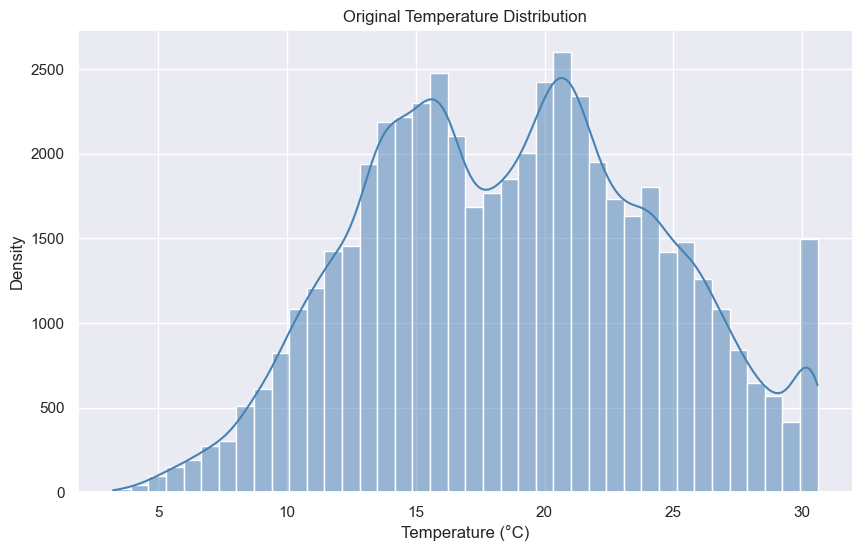

Sampling Distribution for n = 1
Mean of sample means: 18.8183
Population mean: 18.7473
Std of sample means: 5.7742
Expected std (σ/√n): 5.6652
--------------------------------------------------
Sampling Distribution for n = 5
Mean of sample means: 18.8459
Population mean: 18.7473
Std of sample means: 2.5206
Expected std (σ/√n): 2.5336
--------------------------------------------------
Sampling Distribution for n = 30
Mean of sample means: 18.7652
Population mean: 18.7473
Std of sample means: 1.0134
Expected std (σ/√n): 1.0343
--------------------------------------------------
Sampling Distribution for n = 100
Mean of sample means: 18.7357
Population mean: 18.7473
Std of sample means: 0.5591
Expected std (σ/√n): 0.5665
--------------------------------------------------


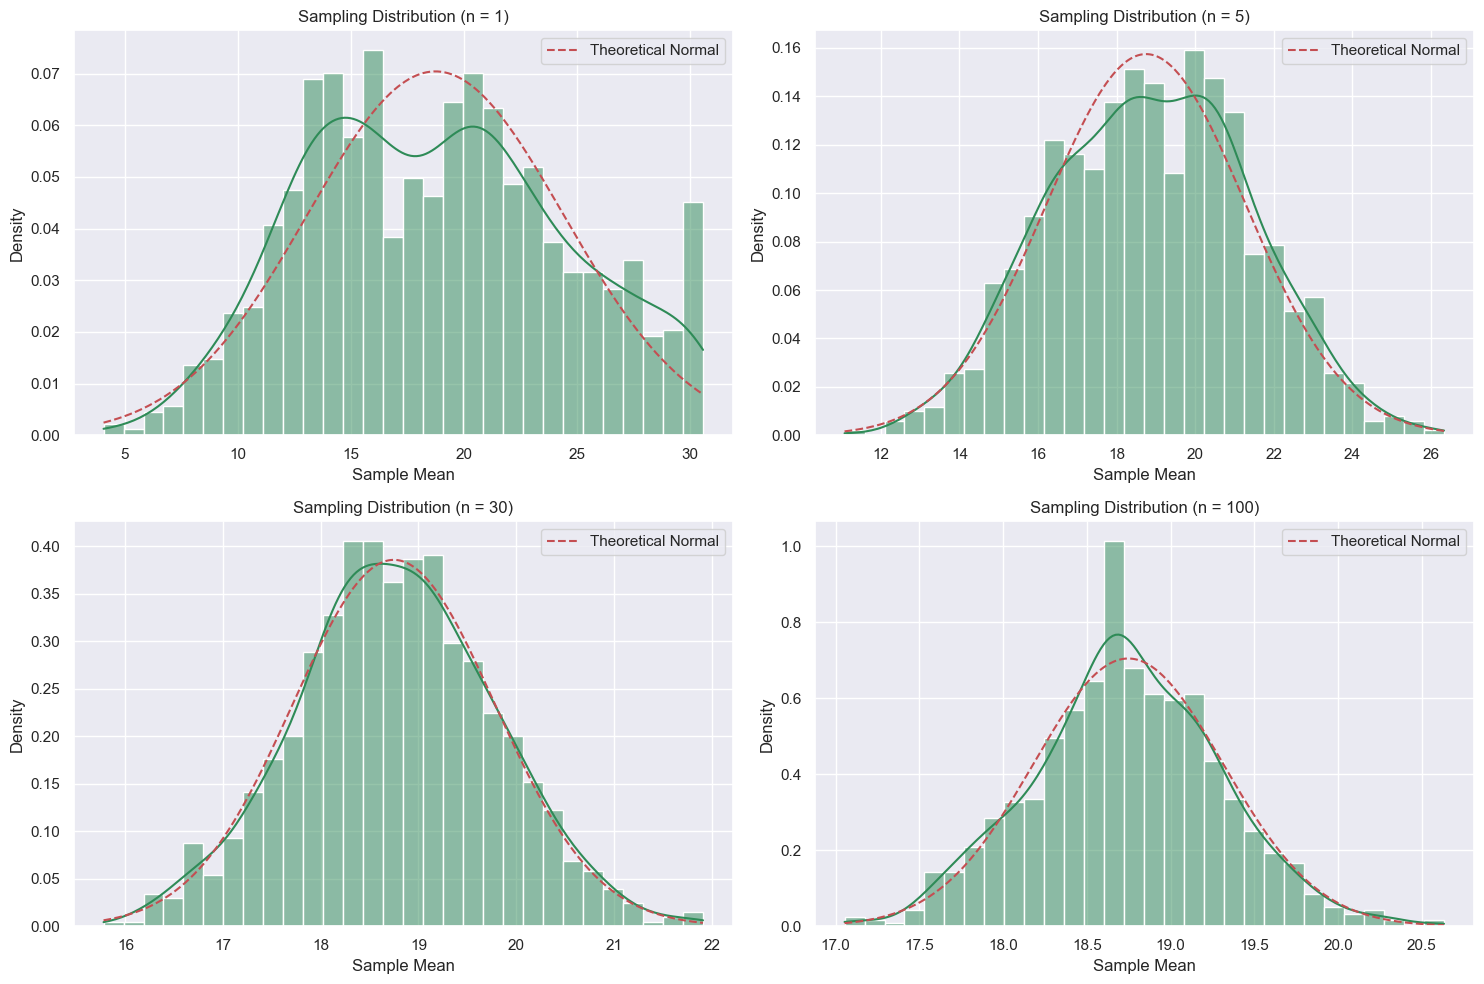

In [30]:
# Central Limit Theorem application (20 points)

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the column of interest (cleaned)
population = Power_Consumtion['Temperature'].dropna().values


def simulate_sampling_distribution(population, sample_size, n_samples=1000):
    """Generate sampling distribution of means."""
    sample_means = np.array([
        np.mean(np.random.choice(population, size=sample_size, replace=True))
        for _ in range(n_samples)
    ])
    return sample_means


def plot_sampling_distribution(population, sample_size, n_samples=1000, ax=None):
    """Visualize sampling distribution with theoretical normal curve."""
    
    sample_means = simulate_sampling_distribution(population, sample_size, n_samples)

    if ax is None:
        ax = plt.gca()

    # Histogram of sample means (density=True for proper scaling)
    sns.histplot(sample_means, kde=True, ax=ax, bins=30, stat='density', color='seagreen')

    ax.set_title(f'Sampling Distribution (n = {sample_size})')
    ax.set_xlabel('Sample Mean')
    ax.set_ylabel('Density')

    # Theoretical normal distribution
    pop_mean = np.mean(population)
    pop_std = np.std(population, ddof=0)
    theoretical_std = pop_std / np.sqrt(sample_size)

    x = np.linspace(sample_means.min(), sample_means.max(), 500)
    ax.plot(
        x,
        stats.norm.pdf(x, pop_mean, theoretical_std),
        'r--',
        label='Theoretical Normal'
    )
    ax.legend()

    # Print statistics
    print(f'Sampling Distribution for n = {sample_size}')
    print(f'Mean of sample means: {np.mean(sample_means):.4f}')
    print(f'Population mean: {pop_mean:.4f}')
    print(f'Std of sample means: {np.std(sample_means):.4f}')
    print(f'Expected std (σ/√n): {theoretical_std:.4f}')
    print('-' * 50)


# ---------------------------------------
# Visualization
# ---------------------------------------

# Original population distribution
plt.figure(figsize=(10, 6))
sns.histplot(population, kde=True, bins=40, color='steelblue')
plt.title('Original Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.show()

# Sampling distributions for different sample sizes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sample_sizes = [1, 5, 30, 100]

for idx, sample_size in enumerate(sample_sizes):
    ax = axes[idx // 2, idx % 2]
    plot_sampling_distribution(population, sample_size, ax=ax)

plt.tight_layout()
plt.show()


Result Interpretation:

This visualization and calculation showcase how the Central Limit Theorem explains that with large enough sample sizes, the distribution of sample means will approximate a normal distribution, even if the underlying population is not normally distributed. 

<span style="font-size: 16px; font-family: Arial;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.5 Regression Analysis</span><br>

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


def fit_and_plot_regression(X, y, title="Linear Regression Example"):
    """Fit linear regression and visualize results."""
    
    # Ensure correct shapes and remove NaNs
    data = np.column_stack([X, y])
    data = data[~np.isnan(data).any(axis=1)]
    
    X_clean = data[:, 0].reshape(-1, 1)
    y_clean = data[:, 1]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_clean, y_clean, test_size=0.2, random_state=42
    )
    
    # Fit model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Metrics
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.scatter(X_train, y_train, alpha=0.5, label='Training Data')
    plt.scatter(X_test, y_test, alpha=0.5, label='Test Data')

    # Regression line
    x_line = np.linspace(X_clean.min(), X_clean.max(), 100).reshape(-1, 1)
    plt.plot(x_line, model.predict(x_line), color='red', label='Regression Line')

    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Results
    print("Model Parameters:")
    print(f"Slope: {model.coef_[0]:.3f}")
    print(f"Intercept: {model.intercept_:.3f}")
    print("\nModel Performance:")
    print(f"R² (Train): {r2_train:.3f}")
    print(f"R² (Test): {r2_test:.3f}")
    print(f"RMSE (Train): {rmse_train:.3f}")
    print(f"RMSE (Test): {rmse_test:.3f}")


Linear Regression:


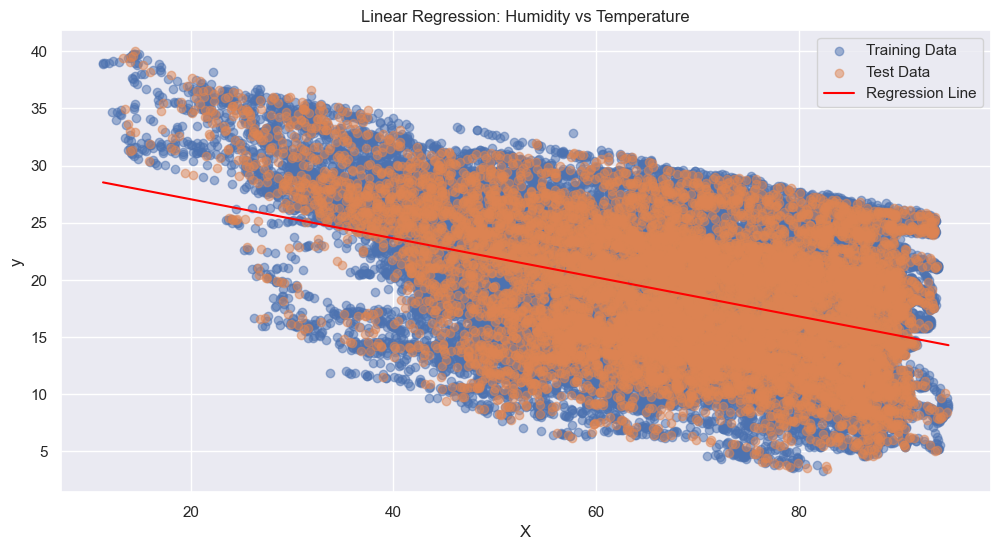

Model Parameters:
Slope: -0.171
Intercept: 30.467

Model Performance:
R² (Train): 0.209
R² (Test): 0.222
RMSE (Train): 5.153
RMSE (Test): 5.201


In [66]:
# Feature Array
X = Power_Consumtion['Humidity'].values

# Target Array
y = Power_Consumtion['Temperature'].values

print("Linear Regression:")
fit_and_plot_regression(
    X, y,
    title="Linear Regression: Humidity vs Temperature"
)


Results: The poor fit of the regression line to the data (as indicated by the low R^2 values in your earlier output) confirms that the linear regression model is not a good fit.

Comparing Different Polynomial Degrees:


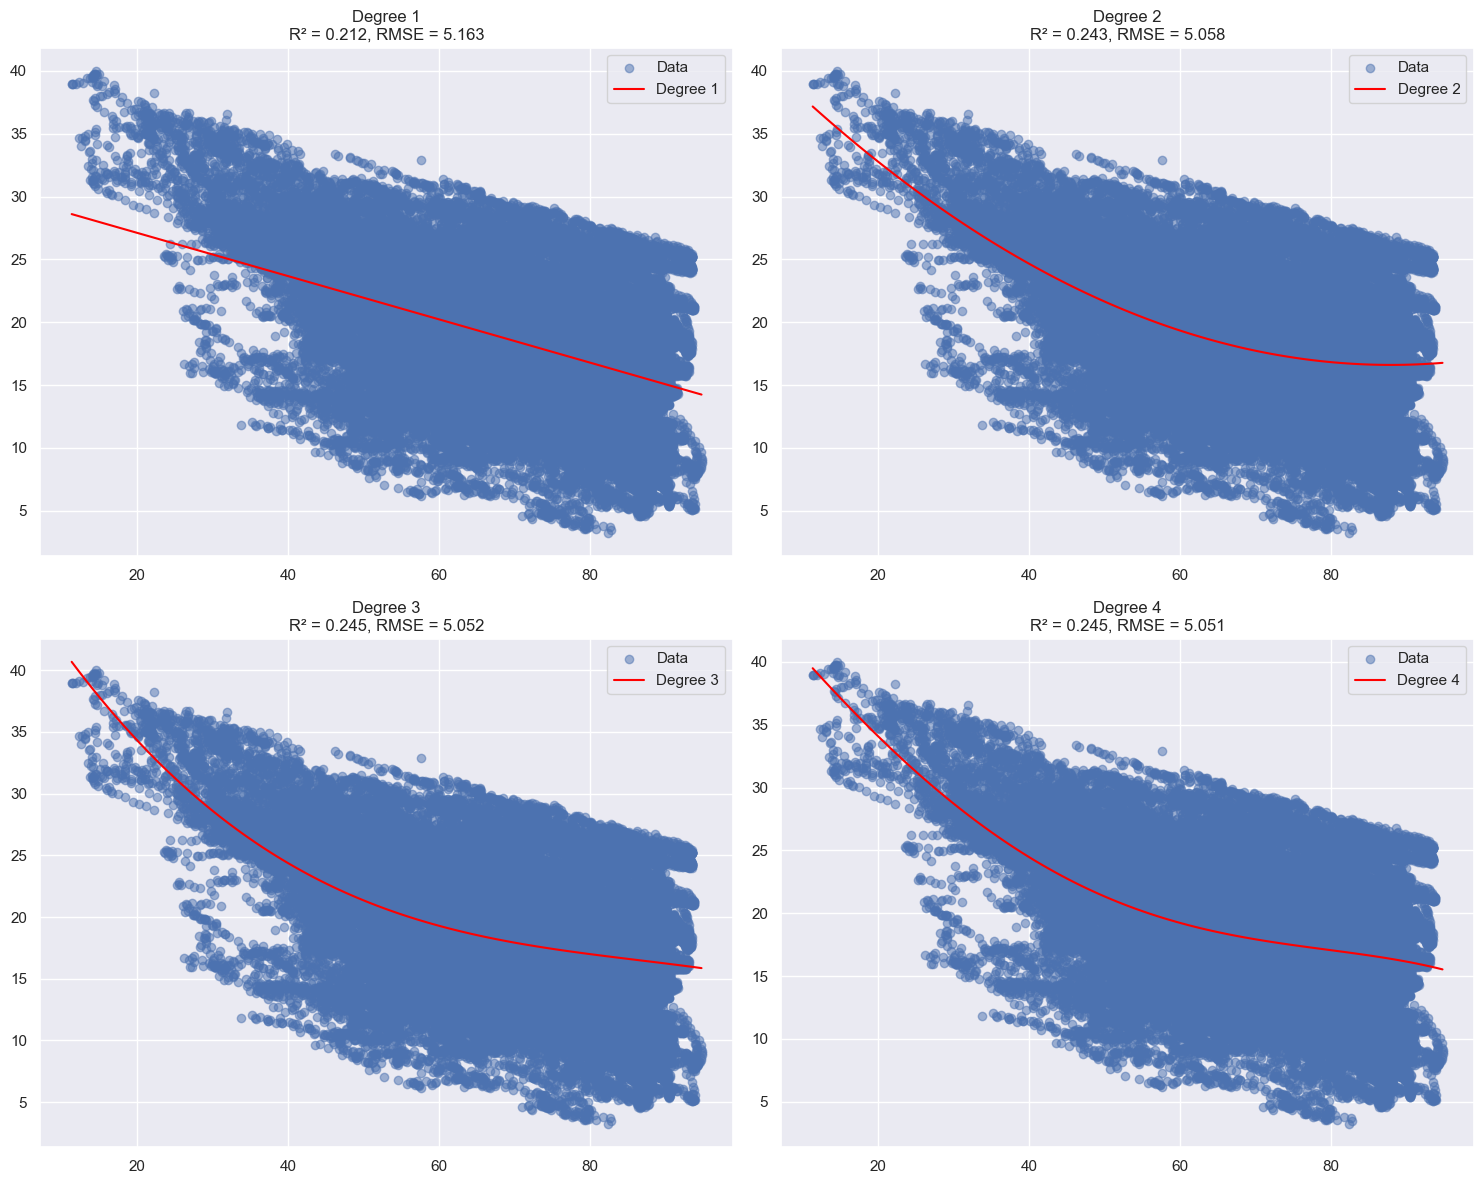


Comparing Cross-validation Scores:


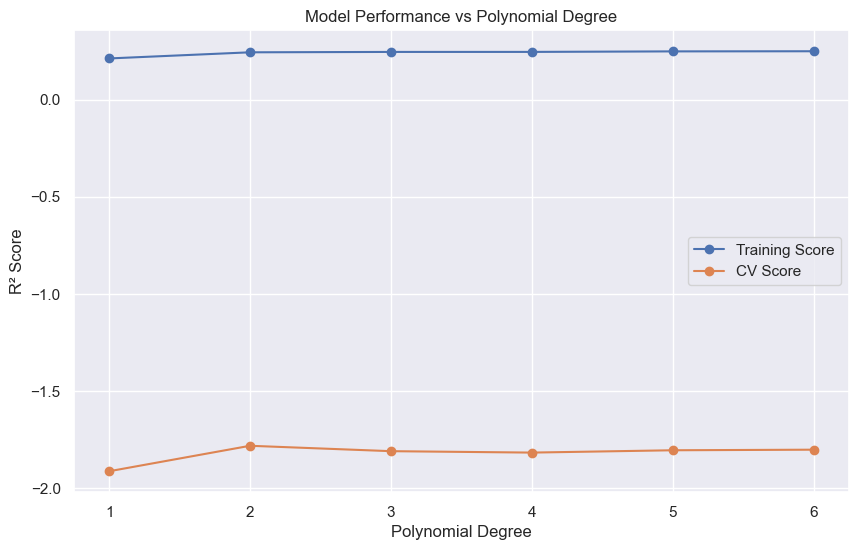


Best polynomial degree based on CV: 2

Best Model (Degree 2):
R² Score: 0.243
RMSE: 5.058

Residual Analysis:


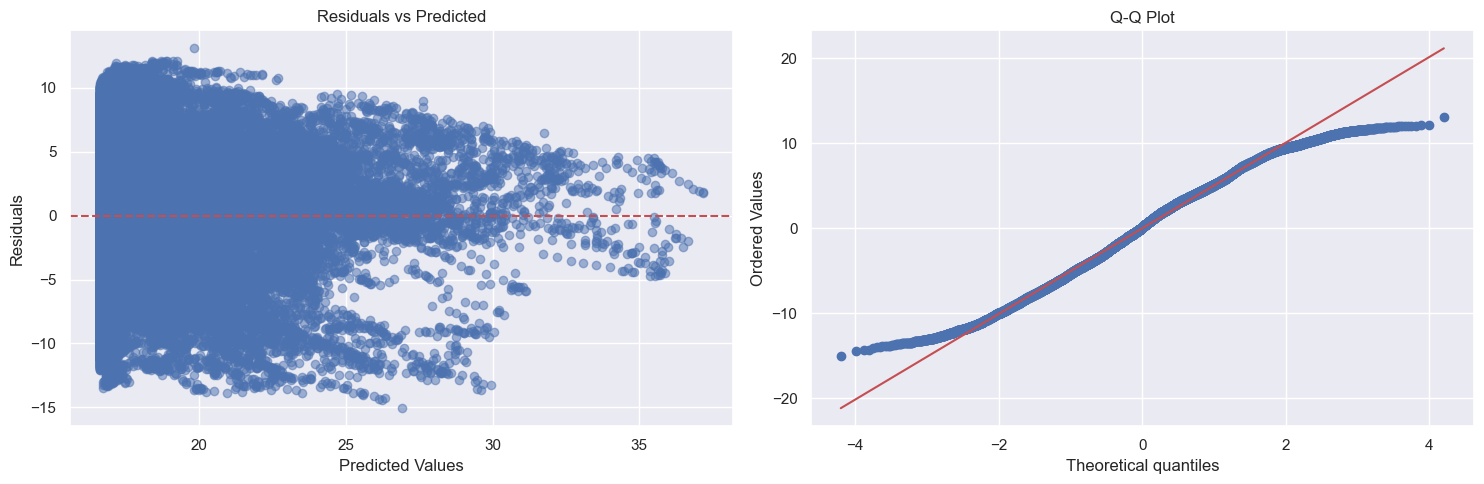

In [67]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


# --------------------------------------------------
# Core functions
# --------------------------------------------------

def fit_polynomial_regression(X, y, degree, scaled=True):
    """Fit polynomial regression with optional scaling."""

    # Remove NaNs
    data = np.column_stack([X, y])
    data = data[~np.isnan(data).any(axis=1)]

    X_clean = data[:, 0].reshape(-1, 1)
    y_clean = data[:, 1]

    if scaled:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_clean)
    else:
        scaler = None
        X_scaled = X_clean

    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_scaled)

    model = LinearRegression()
    model.fit(X_poly, y_clean)

    return model, poly, scaler


def evaluate_model(model, poly, scaler, X, y):
    """Evaluate model performance."""

    data = np.column_stack([X, y])
    data = data[~np.isnan(data).any(axis=1)]

    X_clean = data[:, 0].reshape(-1, 1)
    y_clean = data[:, 1]

    X_transformed = scaler.transform(X_clean) if scaler else X_clean
    X_poly = poly.transform(X_transformed)

    y_pred = model.predict(X_poly)

    r2 = r2_score(y_clean, y_pred)
    rmse = np.sqrt(mean_squared_error(y_clean, y_pred))

    return r2, rmse, y_pred


def plot_polynomial_fits(X, y, max_degree=4):
    """Plot polynomial fits of different degrees."""

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()

    for degree in range(1, max_degree + 1):
        model, poly, scaler = fit_polynomial_regression(X, y, degree)

        X_plot = np.linspace(
            np.nanmin(X), np.nanmax(X), 100
        ).reshape(-1, 1)
        X_plot_scaled = scaler.transform(X_plot) if scaler else X_plot
        X_plot_poly = poly.transform(X_plot_scaled)
        y_plot = model.predict(X_plot_poly)

        r2, rmse, _ = evaluate_model(model, poly, scaler, X, y)

        ax = axes[degree - 1]
        ax.scatter(X, y, alpha=0.5, label='Data')
        ax.plot(X_plot, y_plot, color='red', label=f'Degree {degree}')
        ax.set_title(f'Degree {degree}\nR² = {r2:.3f}, RMSE = {rmse:.3f}')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()


def compare_cv_scores(X, y, max_degree=6):
    """Compare cross-validation scores for different polynomial degrees."""

    data = np.column_stack([X, y])
    data = data[~np.isnan(data).any(axis=1)]

    X_clean = data[:, 0].reshape(-1, 1)
    y_clean = data[:, 1]

    train_scores = []
    cv_scores = []
    degrees = range(1, max_degree + 1)

    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X_clean)

        model = LinearRegression()
        train_score = model.fit(X_poly, y_clean).score(X_poly, y_clean)
        cv_score = np.mean(cross_val_score(model, X_poly, y_clean, cv=5))

        train_scores.append(train_score)
        cv_scores.append(cv_score)

    plt.figure(figsize=(10, 6))
    plt.plot(degrees, train_scores, 'o-', label='Training Score')
    plt.plot(degrees, cv_scores, 'o-', label='CV Score')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('R² Score')
    plt.title('Model Performance vs Polynomial Degree')
    plt.legend()
    plt.grid(True)
    plt.show()

    return cv_scores


def plot_residuals(model, poly, scaler, X, y):
    """Residual diagnostics."""

    data = np.column_stack([X, y])
    data = data[~np.isnan(data).any(axis=1)]

    X_clean = data[:, 0].reshape(-1, 1)
    y_clean = data[:, 1]

    X_scaled = scaler.transform(X_clean) if scaler else X_clean
    X_poly = poly.transform(X_scaled)

    y_pred = model.predict(X_poly)
    residuals = y_clean - y_pred

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.scatter(y_pred, residuals, alpha=0.5)
    ax1.axhline(0, color='r', linestyle='--')
    ax1.set_xlabel('Predicted Values')
    ax1.set_ylabel('Residuals')
    ax1.set_title('Residuals vs Predicted')
    ax1.grid(True)

    stats.probplot(residuals, dist="norm", plot=ax2)
    ax2.set_title('Q-Q Plot')

    plt.tight_layout()
    plt.show()


# --------------------------------------------------
# Power dataset usage
# --------------------------------------------------

X = Power_Consumtion['Humidity'].values
y = Power_Consumtion['Temperature'].values

print("Comparing Different Polynomial Degrees:")
plot_polynomial_fits(X, y)

print("\nComparing Cross-validation Scores:")
cv_scores = compare_cv_scores(X, y)

best_degree = np.argmax(cv_scores) + 1
print(f"\nBest polynomial degree based on CV: {best_degree}")

model, poly, scaler = fit_polynomial_regression(X, y, degree=best_degree)
r2, rmse, _ = evaluate_model(model, poly, scaler, X, y)

print(f"\nBest Model (Degree {best_degree}):")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

print("\nResidual Analysis:")
plot_residuals(model, poly, scaler, X, y)


Scatter plots: Visualizing the relationship between the independent variable (X-axis) and the dependent variable (Y-axis) for different polynomial degrees.

Model performance plot: Showing how the model's performance (likely measured by metrics like R-squared or Mean Squared Error) changes with increasing polynomial degrees.

Residual plots: Examining the distribution of residuals (the difference between predicted and actual values) for different models.


<span style="font-size: 16px; font-family: Arial;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.6 Bonus Points</span><br>

Explained Variance Ratio: [0.46604103 0.23862273]
Total Variance Explained: 0.7046637608085494


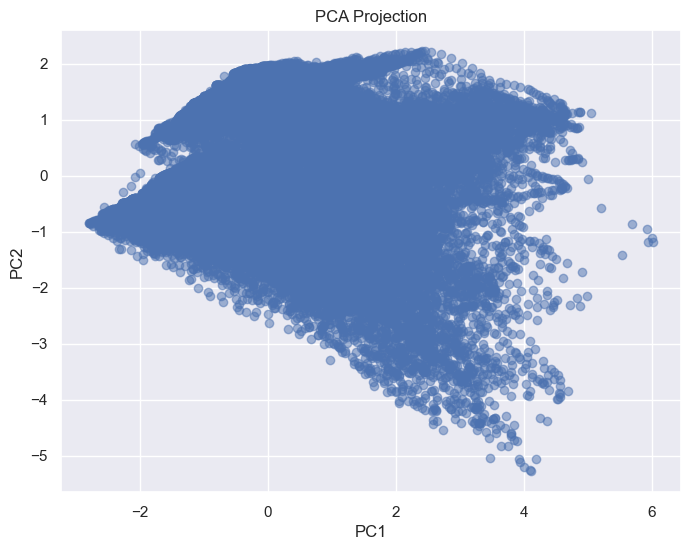

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

features = [
    'Temperature', 'Humidity', 'WindSpeed',
    'DiffuseFlows', 'GeneralDiffuseFlows'
]

X = Power_Consumtion[features].dropna()

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", pca.explained_variance_ratio_.sum())

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection")
plt.grid(True)
plt.show()



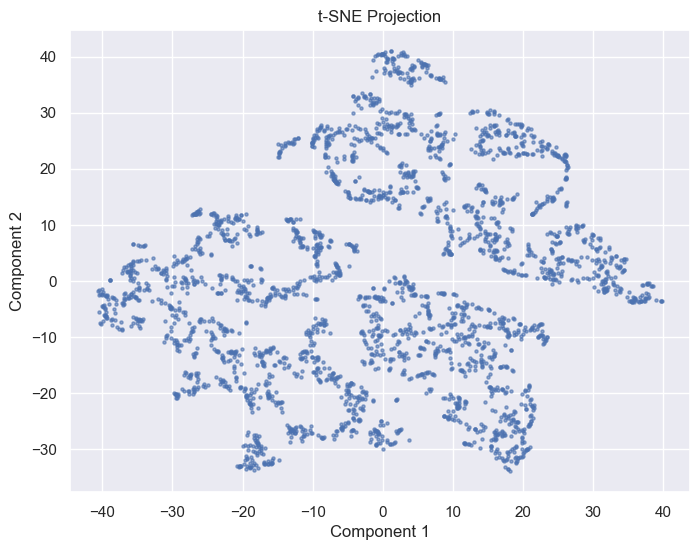

In [83]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Select features
features = [
    'Temperature', 'Humidity', 'WindSpeed',
    'DiffuseFlows', 'GeneralDiffuseFlows'
]

X = Power_Consumtion[features].dropna()

# OPTIONAL: subsample for speed
X = X.sample(n=min(3000, len(X)), random_state=42)

# Scale data (VERY important for t-SNE)
X_scaled = StandardScaler().fit_transform(X)

# Fast t-SNE
tsne = TSNE(
    n_components=2,
    perplexity=30,
    max_iter=500,        # lower = faster
    learning_rate='auto',
    random_state=42
)

X_tsne = tsne.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=5, alpha=0.6)
plt.title("t-SNE Projection")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()


C:\Users\Muhammad Adeel\AppData\Roaming\Python\Python313\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


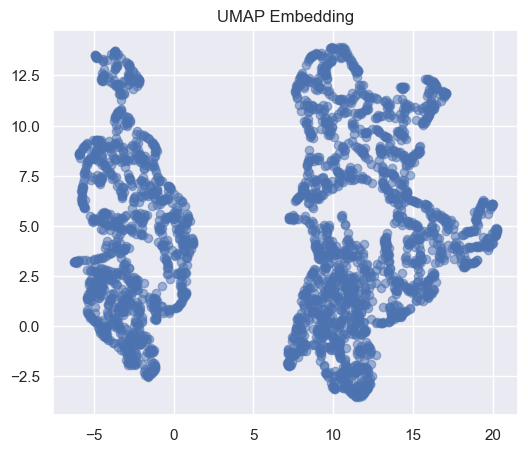

In [82]:
import umap.umap_ as umap

umap_model = umap.UMAP(
    n_neighbors=10,
    min_dist=0.3,
    n_components=2,
    random_state=42
)

X_umap = umap_model.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_umap[:,0], X_umap[:,1], alpha=0.5)
plt.title("UMAP Embedding")
plt.grid(True)
plt.show()
